In [174]:
from TeamsData import cars
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.stats import linregress
import pandas as pd
import seaborn as sns
import statistics

In [35]:
ufmg = [car for car in cars if car.name == "Formula SAE UFMG"][0]
cefet = [car for car in cars if car.name == "Fórmula Cefast"][0]
eesc = [car for car in cars if car.name == "EESC-USP Formula SAE"][0]
ufsm = [car for car in cars if car.name == "Formula UFSM"][0]
unicamp = [car for car in cars if car.name == "FSAE Unicamp"][0]
fei = [car for car in cars if car.name == "Fórmula FEI"][0]
maua = [car for car in cars if car.name == "Mauá Racing"][0]
zeus = [car for car in cars if car.name == "Zeus Formula SAE"][0]
icarus = [car for car in cars if car.name == "Icarus UFRJ de Formula SAE"][0]
cem = [car for car in cars if car.name == "Fórmula CEM IC"][0]
poli = [car for car in cars if car.name == "Poli Racing"][0]
utfpr = [car for car in cars if car.name == "Fórmula UTFPR"][0]




competition_distribution = {
            "design":180/1000,
            "cost":100/1000,
            "business":100/1000,
            "acceleration":90/1000,
            "skidpad":75/1000,
            "autoX":120/1000,
            "enduro":230/1000,
            "efficiency":100/1000
        }

competition_points = {
            "design":180,
            "cost":100,
            "business":100,
            "acceleration":90,
            "skidpad":75,
            "autoX":120,
            "enduro":230,
            "efficiency":100
        }

In [3]:
def getDeltaSkidPad(vector):
    return vector[0]-vector[1]

def mad(data, scale='normal'):
    median = np.median(data)
    mad_value = np.median(np.abs(data - median))
    if scale == 'normal':
        mad_value *= 1.4826  # Escala para a distribuição normal
    return mad_value

# Função para aplicar o filtro de Hampel
def hampel_filter(data, window_size=7, n=3):
    data = np.array(data)
    new_data = data.copy()
    
    for i in range(window_size // 2, len(data) - window_size // 2):
        window_data = data[i - window_size // 2:i + window_size // 2 + 1]
        median = np.median(window_data)
        MAD = mad(window_data)
        
        if np.abs(data[i] - median) > n * MAD:
            new_data[i] = median
    
    return new_data

def calculateAcelScore(bestTime,testTime):
    Tmax = bestTime*1.5
    if testTime <= bestTime:
        return 90
    if testTime > Tmax:
        return 4.5
    return 85.5*((Tmax/testTime)-1)/((Tmax/bestTime)-1)+4.5

def calculateSkidScore(bestTime,testTime):
    Tmax = bestTime*1.25
    if testTime <= bestTime:
        return 75
    if testTime > Tmax:
        return 3.5
    return 71.5*((Tmax/testTime)**2-1)/((Tmax/bestTime)**2-1)+3.5

def calculateAutoXScore(bestTime,testTime):
    Tmax = bestTime*1.5
    if testTime <= bestTime:
        return 120
    if testTime > Tmax:
        return 6.5
    return 113.5*((Tmax/testTime)-1)/((Tmax/bestTime)-1)+6.5

def calculateEnduroScore(bestTime,testTime,laps):
    Tmax = bestTime*1.45
    if testTime <= bestTime:
        return 230
    if testTime > Tmax:
        return 0
    if laps < 21:
        return laps
    return 205*((Tmax/testTime)-1)/((Tmax/bestTime)-1)+25

C:\Users\savic\AppData\Local\Temp\ipykernel_312\628558924.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


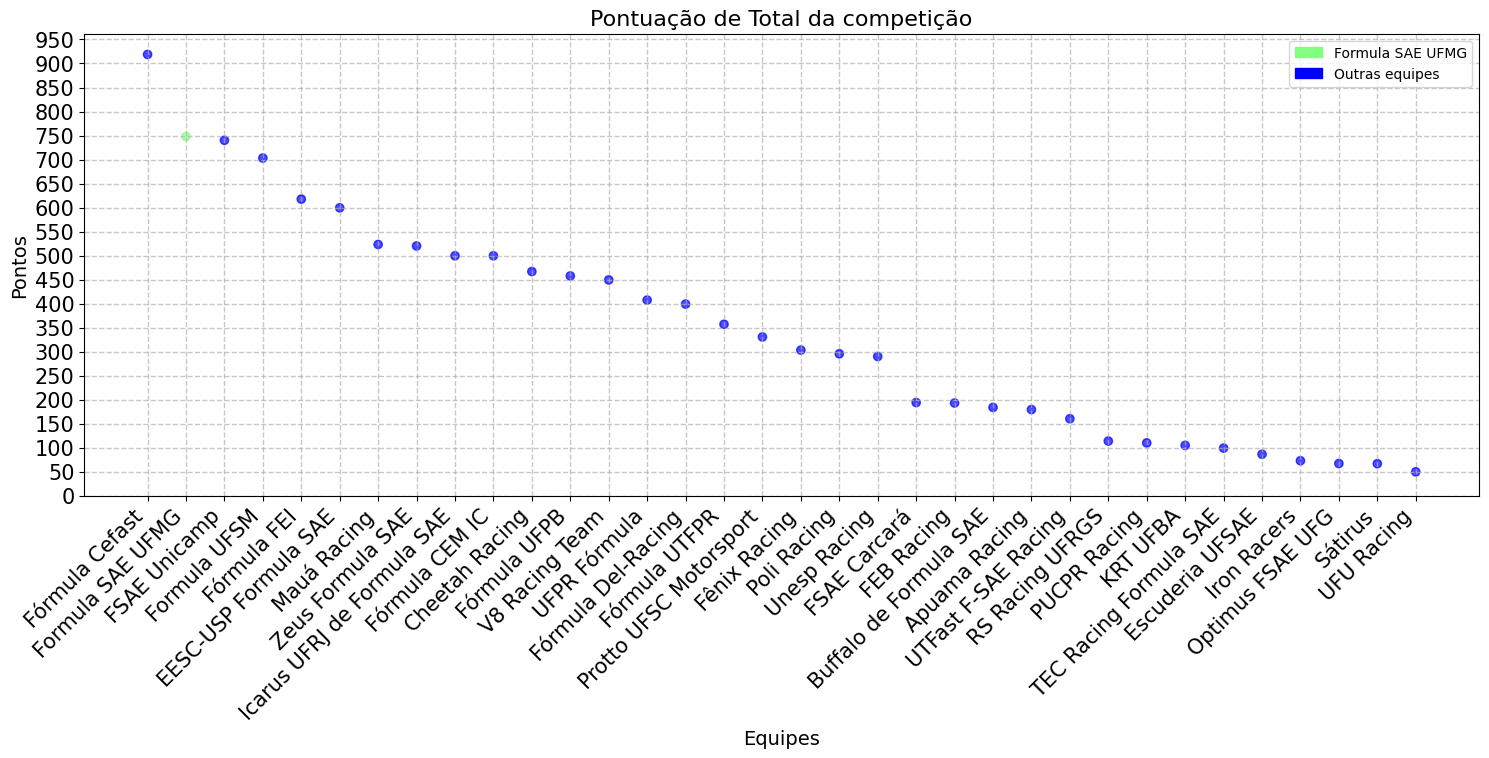

In [4]:
scores = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.getFinalScore(), reverse=True)
for car in cars_sorted:
    scores.append(car.getFinalScore())
    labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(labels, scores, color=colors, alpha=0.7)
ax.set_title('Pontuação de Total da competição', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontos', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_yticks(np.arange(0, 1000, 50)) 

ax.legend(handles=legend_elements, loc='best')

C:\Users\savic\AppData\Local\Temp\ipykernel_312\240826304.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=45, ha='right')


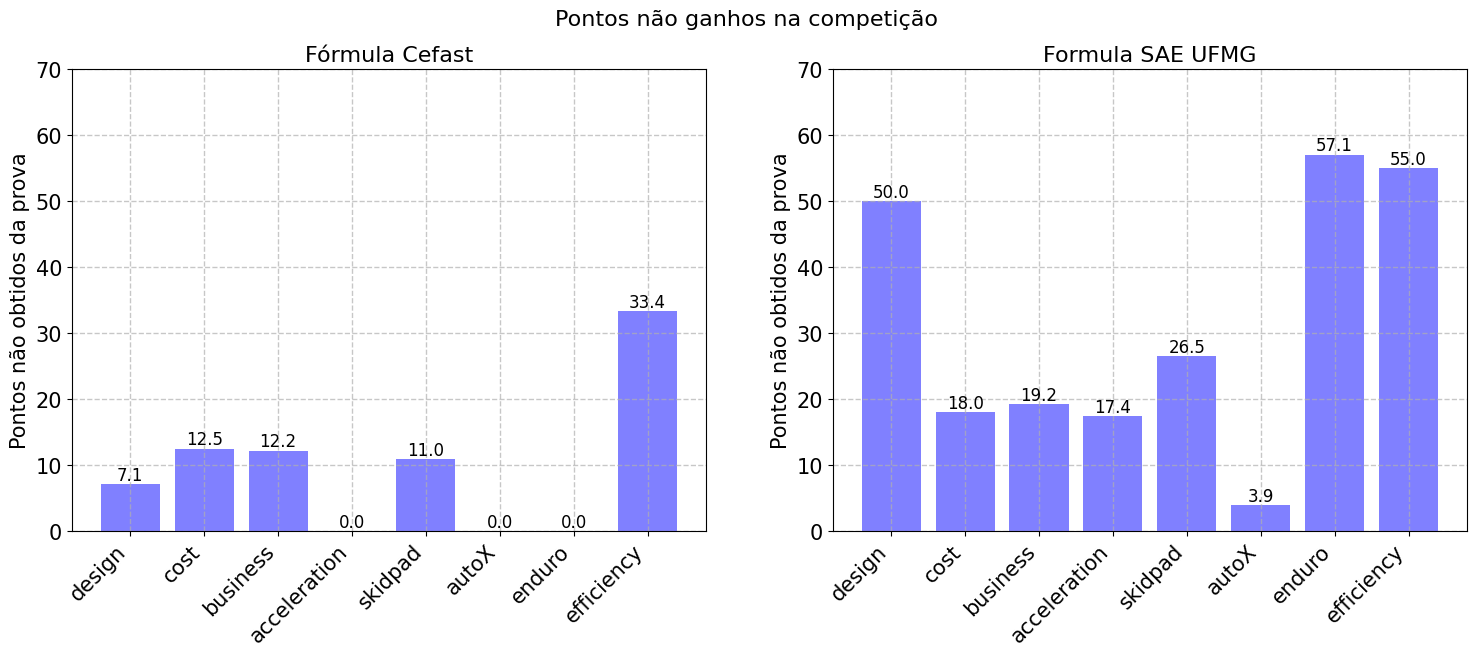

In [5]:
def plotDifference(team,ax):
    team_distribution = team.getAllPoints()
    difference = {key: competition_points[key] - team_distribution[key] for key in team_distribution.keys()}
    categories = list(difference.keys())
    values = list(difference.values())
    colors = [[0.5,0.5,1] for v in values]
    ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
    bars = ax.bar(categories, values, color=colors)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_title(team.name,fontsize = 16)
    ax.set_ylim([0, 70])
    ax.set_ylabel("Pontos não obtidos da prova", fontsize = 15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    

    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}', 
                ha='center', va='bottom', fontsize=12)

fig, axes = plt.subplots(1,2,figsize=(18, 6))
fig.suptitle('Pontos não ganhos na competição', fontsize=16)
ax1 = axes[0]
ax2 = axes[1]

plotDifference(cefet,ax1)
plotDifference(ufmg,ax2)

C:\Users\savic\AppData\Local\Temp\ipykernel_312\3274488544.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=45, ha='right')


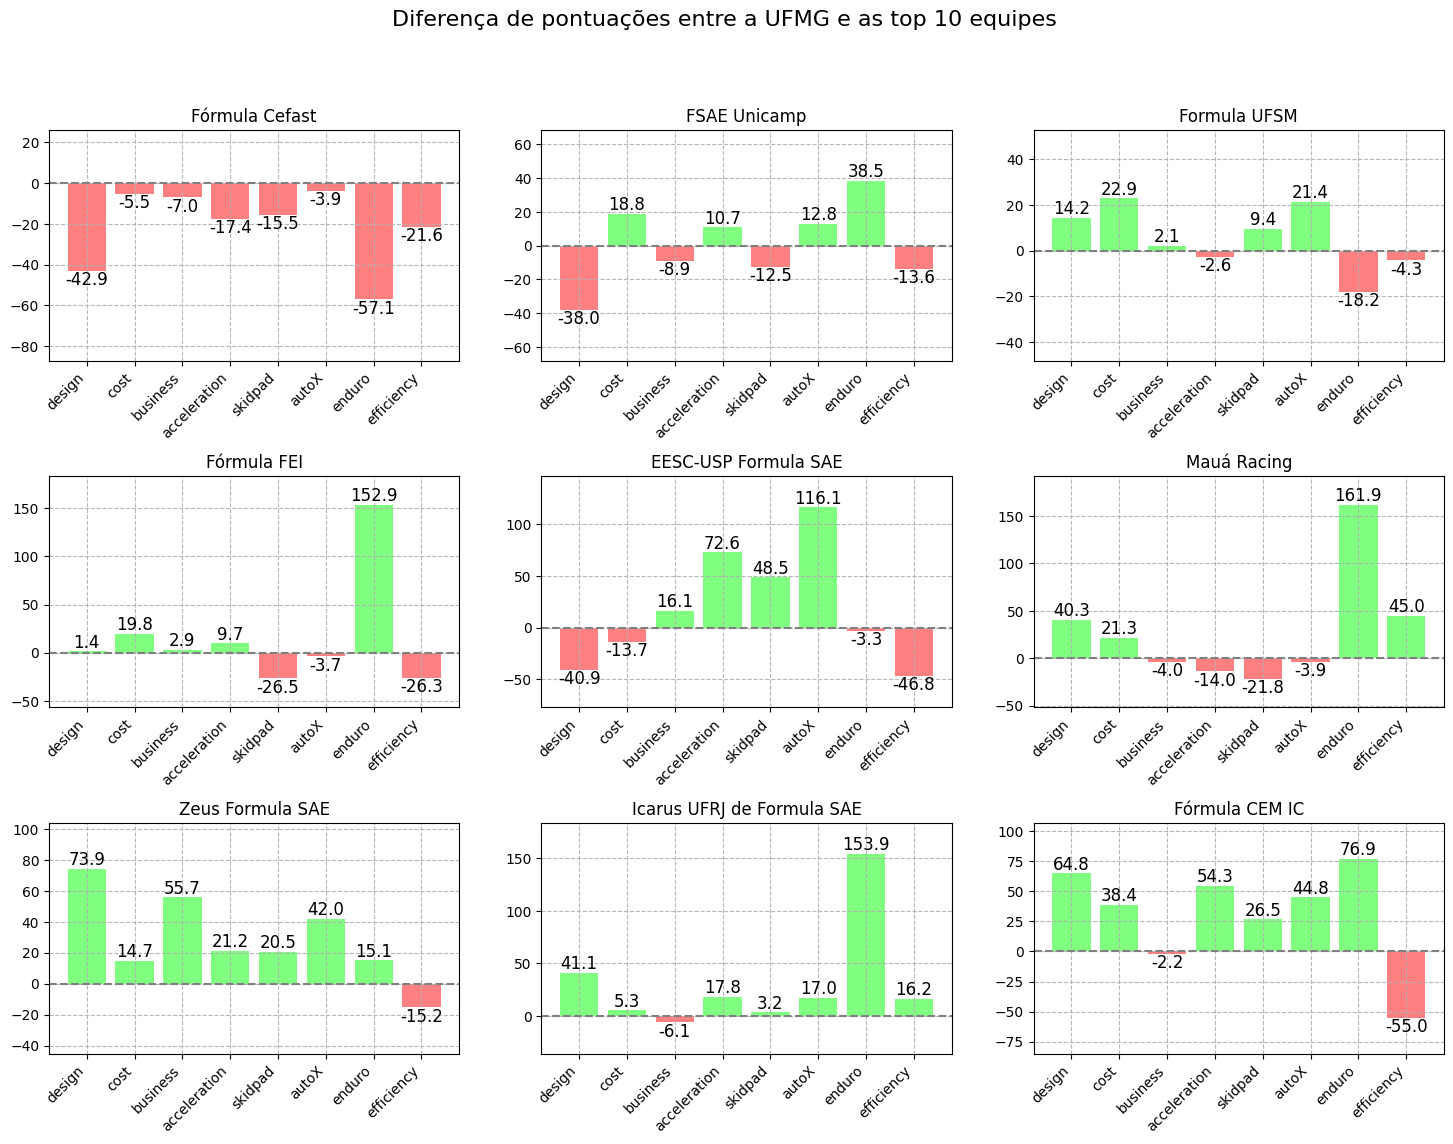

In [6]:
def plotDifference(team, compared,ax):
    compared_distribution = compared.getAllPoints()
    team_distribution = team.getAllPoints()
    difference = {key: team_distribution[key] - compared_distribution[key] for key in team_distribution.keys()}
    categories = list(difference.keys())
    values = list(difference.values())
    colors = [[0.5,1,0.5] if v > 0 else [1,0.5,0.5] for v in values]
    bars = ax.bar(categories, values, color=colors)
    ax.axhline(y=0, color='gray', linestyle='--')
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_title(compared.name)
    for bar, value in zip(bars, values):
        height = bar.get_height()
        if value > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.1f}', 
                    ha='center', va='bottom', fontsize=12)
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.1f}', 
                    ha='center', va='top', fontsize=12)
    
    # Limitar os textos dentro do gráfico
    ax.set_ylim(min(values) - 30, max(values) + 30)
    ax.grid(linestyle='--', alpha=0.9)




fig, axes = plt.subplots(3,3,figsize=(18, 12))
fig.suptitle('Distribuição de pontos nas provas', fontsize=16)
plt.subplots_adjust(hspace=0.5) 

ax1, ax2, ax3 = axes[0]
ax4, ax5, ax6 = axes[1]
ax7, ax8, ax9 = axes[2]
fig.suptitle('Diferença de pontuações entre a UFMG e as top 10 equipes', fontsize=16)
plotDifference(ufmg,cefet,ax1)
plotDifference(ufmg,unicamp,ax2)
plotDifference(ufmg,ufsm,ax3)
plotDifference(ufmg,fei,ax4)
plotDifference(ufmg,eesc,ax5)
plotDifference(ufmg,maua,ax6)
plotDifference(ufmg,zeus,ax7)
plotDifference(ufmg,icarus,ax8)
plotDifference(ufmg,cem,ax9)


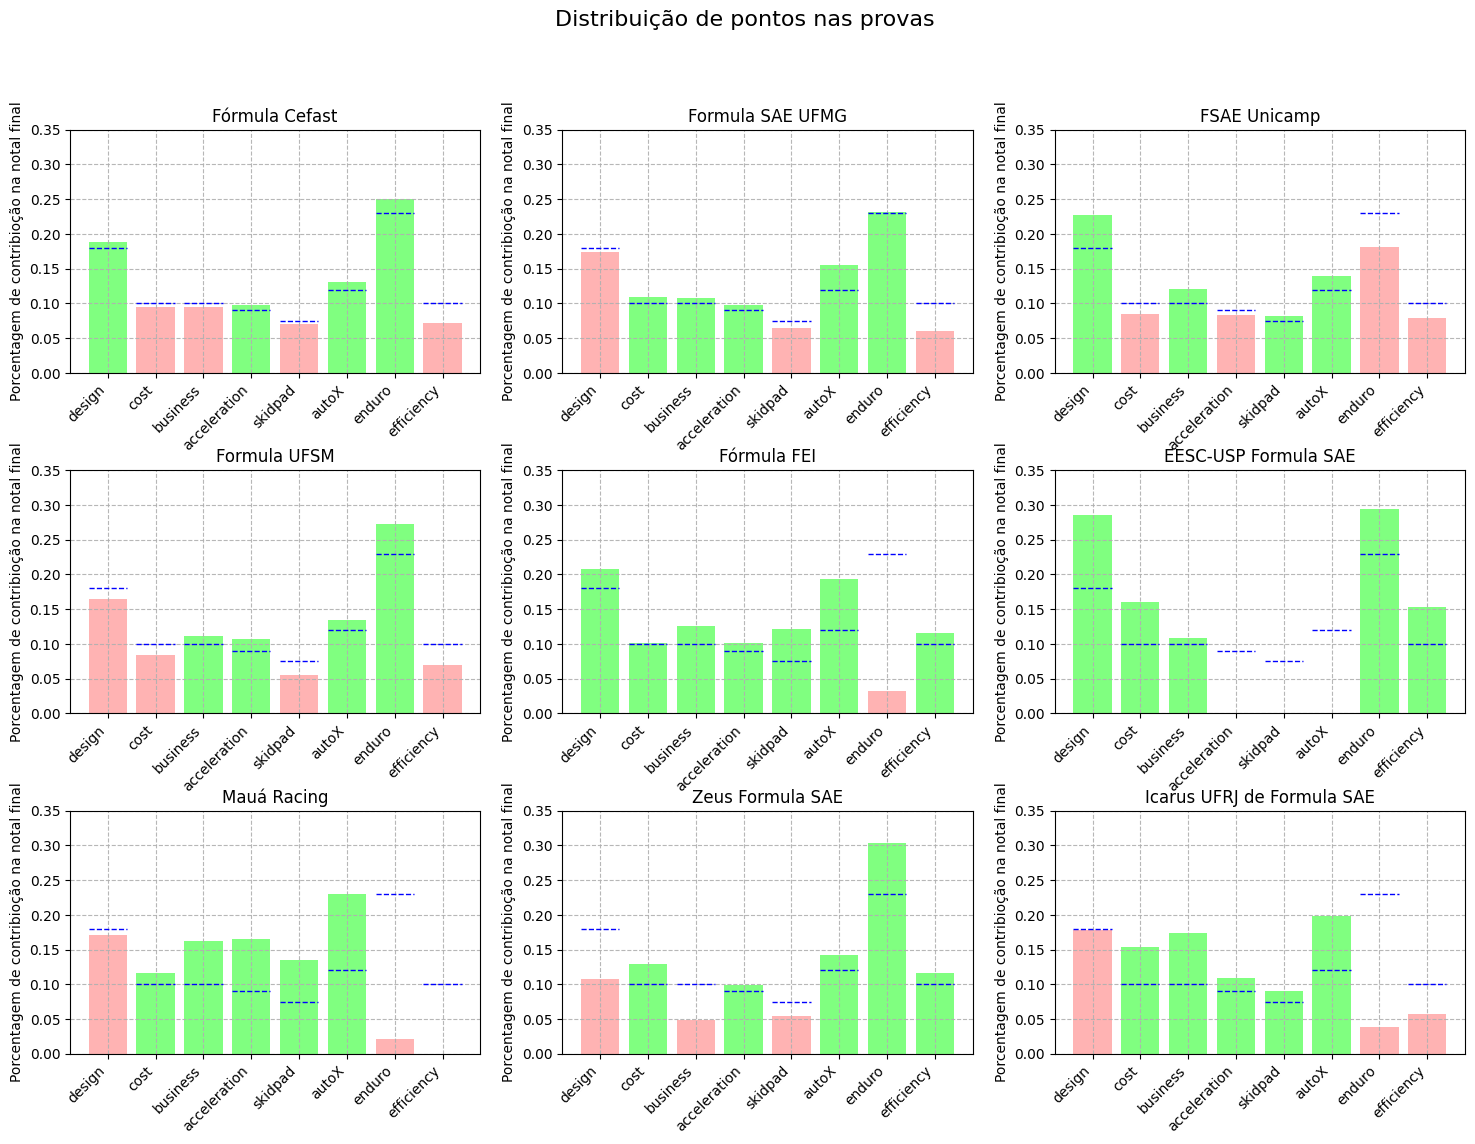

In [7]:
def plotDistribution(team, ax):
    team_distribution = team.getPointsDistribution()
    values = list(team_distribution.values())
    categories = list(team_distribution.keys()) 
    colors = []
    for category, value in zip(categories, values):
        comp_value = competition_distribution.get(category, 0)
        if value > comp_value:
            colors.append([0.5,1,0.5])
        else:
            colors.append([1,0.7,0.7])
    ax.bar(categories, values, color=colors)
    ax.set_ylim([0, 0.35])
    ax.set_title(team.name)
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.grid(linestyle='--', alpha=0.9)
    ax.set_ylabel("Porcentagem de contribioção na notal final")
    for category, comp_value in competition_distribution.items():
        if category in categories:
            index = categories.index(category)
            ax.hlines(y=comp_value, xmin=index - 0.4, xmax=index + 0.4, color='Blue', linestyle='--', linewidth=1, label=f'{category} Benchmark')




fig, axes = plt.subplots(3,3,figsize=(18, 12))
plt.subplots_adjust(hspace=0.4) 
ax1, ax2, ax3 = axes[0]
ax4, ax5, ax6 = axes[1]
ax7, ax8, ax9 = axes[2]
fig.suptitle('Distribuição de pontos nas provas', fontsize=16)
plotDistribution(cefet,ax1)
plotDistribution(ufmg,ax2)
plotDistribution(unicamp,ax3)
plotDistribution(ufsm,ax4)
plotDistribution(fei,ax5)
plotDistribution(eesc,ax6)
plotDistribution(maua,ax7)
plotDistribution(zeus,ax8)
plotDistribution(icarus,ax9)

C:\Users\savic\AppData\Local\Temp\ipykernel_312\182294043.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


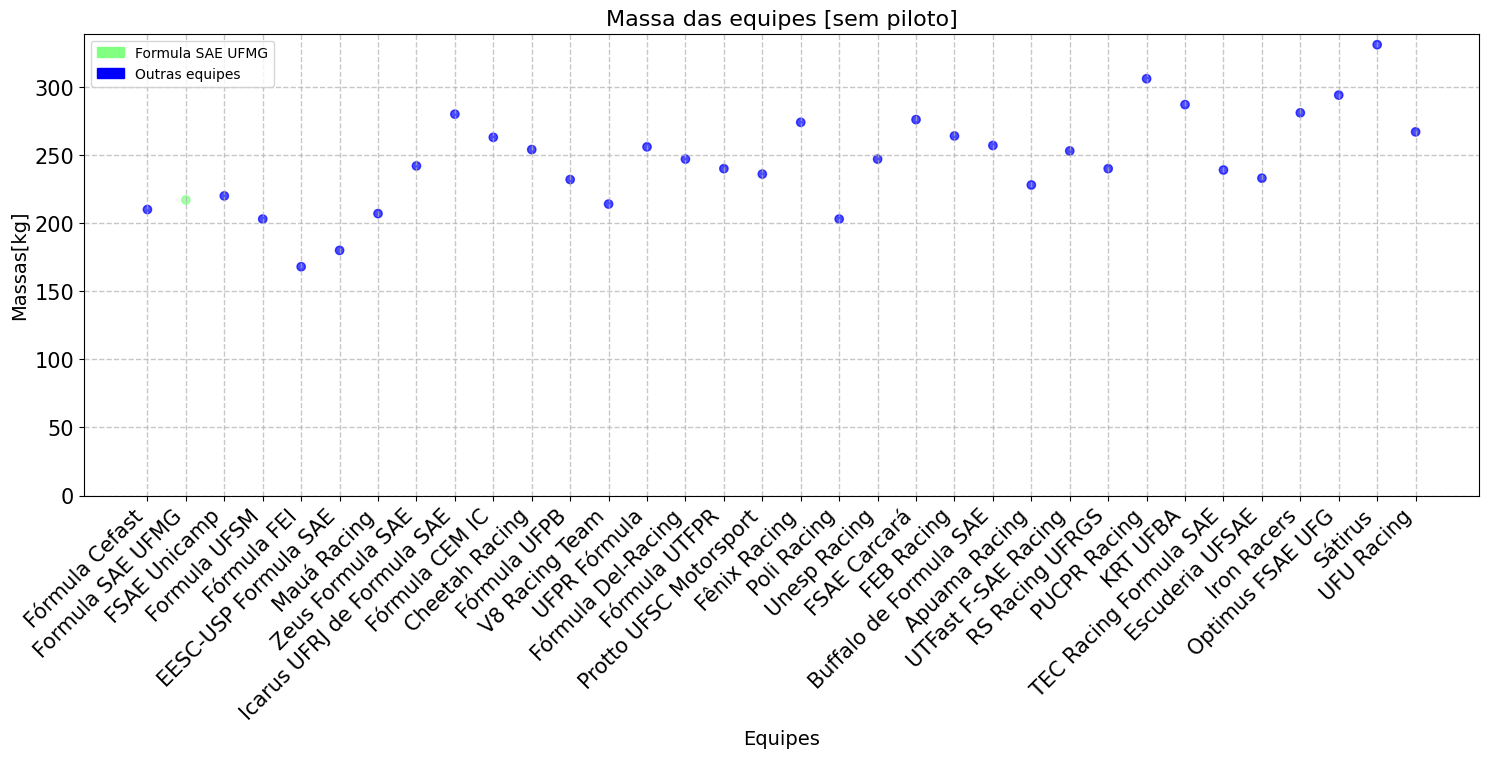

In [8]:

weights = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.getFinalScore(), reverse=True)
for car in cars_sorted:
    weights.append(car.weight)
    labels.append(car.name)

colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(labels, weights, color=colors, alpha=0.7)
ax.set_title('Massa das equipes [sem piloto]', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Massas[kg]', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_yticks(np.arange(0, 350, 50)) 

ax.legend(handles=legend_elements, loc='best')

C:\Users\savic\AppData\Local\Temp\ipykernel_312\2718328119.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=45, ha='right')
C:\Users\savic\AppData\Local\Temp\ipykernel_312\2718328119.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation=45, ha='right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\savic\AppData\Local\Temp\ipykernel_312\2718328119.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels, rotation=45, ha='right')


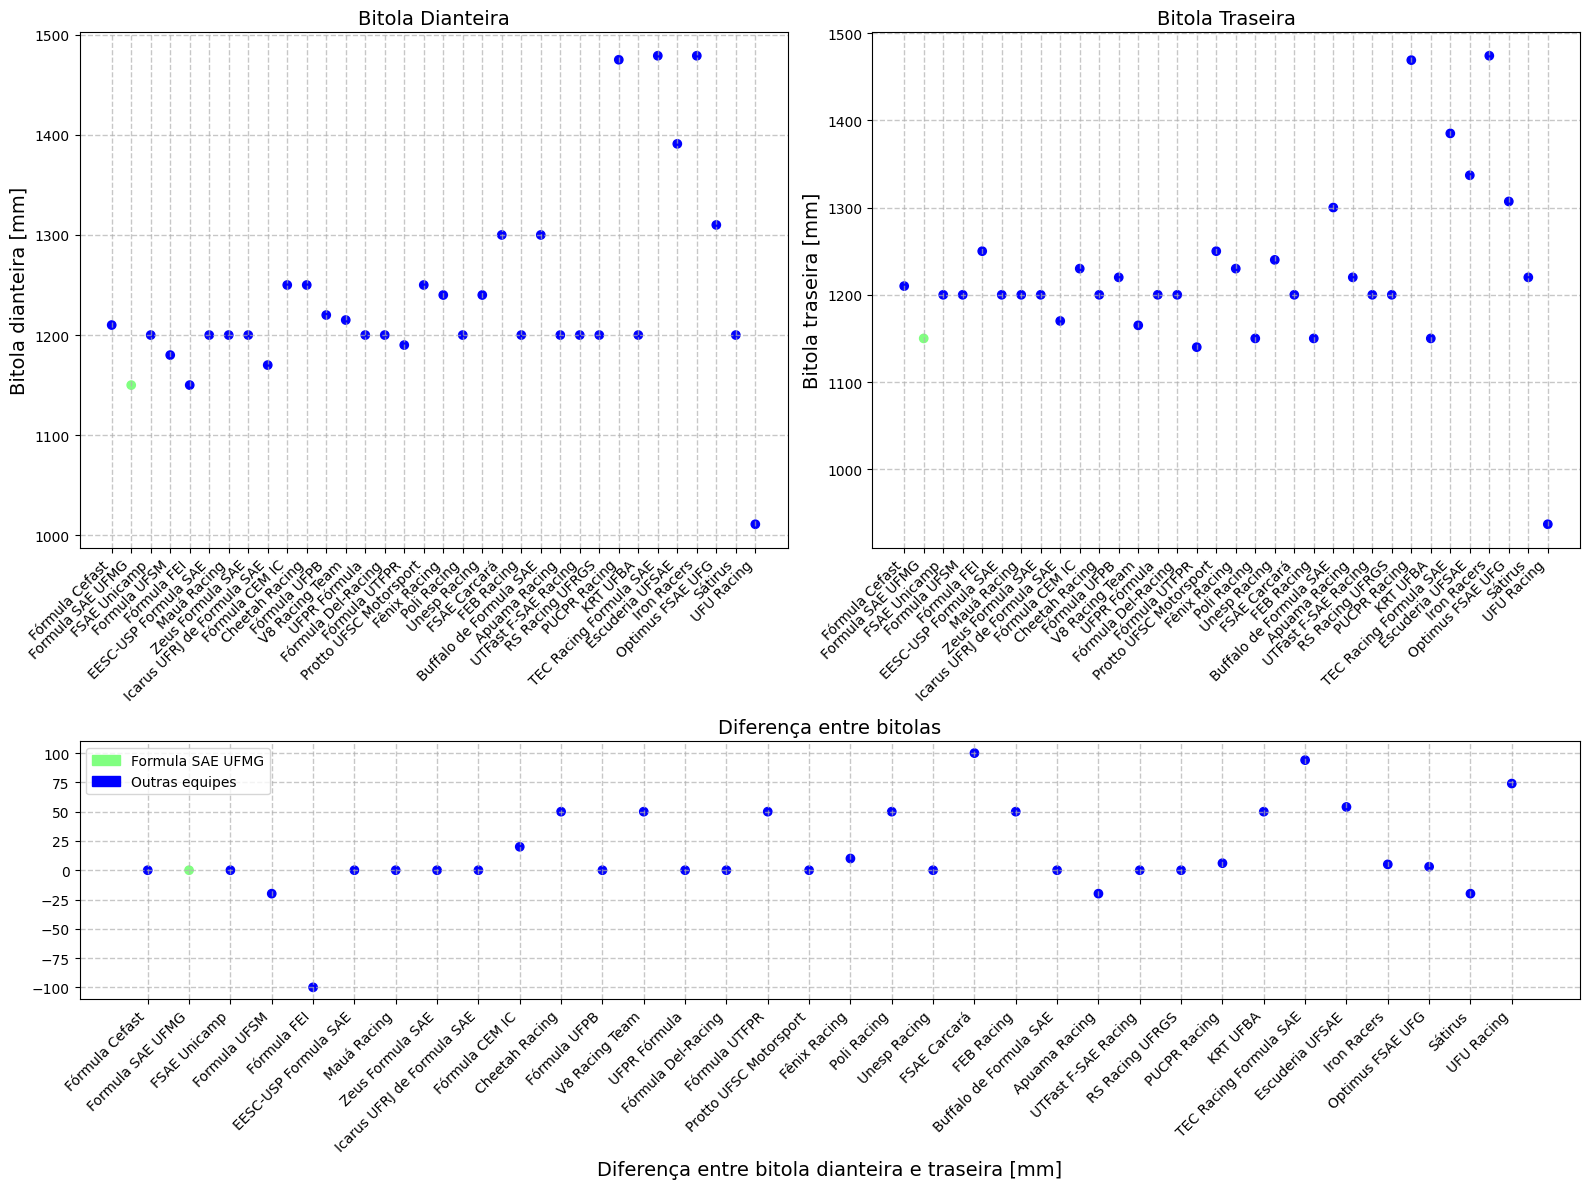

In [107]:

import matplotlib.gridspec as gridspec


cars_sorted = sorted(cars, key=lambda car: car.getFinalScore(), reverse=True)
dianteira = [car.trackF for car in cars_sorted]
traseira = [car.trackR for car in cars_sorted]
delta = [car.trackF - car.trackR for car in cars_sorted]
labels = [car.name for car in cars_sorted]
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]

fig = plt.figure(figsize=(16, 12))

# Define o gridspec
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])  # 2 linhas e 2 colunas, com a segunda linha ocupando mais espaço

# Adiciona o primeiro subplot
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(labels,dianteira,color=colors)
ax1.set_title("Bitola Dianteira",fontsize = 14)
ax1.set_ylabel("Bitola dianteira [mm]",fontsize = 14)
# ax1.scatter([1],[ufmg.trackF], color = [0.5, 1, 0.5])
ax1.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
ax1.set_xticklabels(labels, rotation=45, ha='right')



# ax1.set_xticks([])
# Adiciona o segundo subplot
ax2 = plt.subplot(gs[0, 1])
ax2.scatter(labels,traseira,color=colors)
ax2.set_title("Bitola Traseira",fontsize = 14)
ax2.set_ylabel("Bitola traseira [mm]",fontsize = 14)
# ax2.scatter([1],[ufmg.trackR], color = [0.5, 1, 0.5])
ax2.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
# ax2.set_xticks([])
ax2.set_xticklabels(labels, rotation=45, ha='right')


# Adiciona o terceiro subplot que ocupa duas colunas
ax3 = plt.subplot(gs[1, :])
ax3.scatter(labels,delta,color=colors)
ax3.set_title("Diferença entre bitolas",fontsize = 14)
ax3.set_xlabel("Diferença entre bitola dianteira e traseira [mm]",fontsize = 14)
# ax3.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
# ax3.set_yticks([])
ax3.legend(fontsize = 14)
ax3.set_xticklabels(labels, rotation=45, ha='right')
ax3.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]

ax3.legend(handles=legend_elements, loc='best')



# Ajusta o layout
plt.tight_layout()

plt.show()

C:\Users\savic\AppData\Local\Temp\ipykernel_312\2342374090.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=45, ha='right')
C:\Users\savic\AppData\Local\Temp\ipykernel_312\2342374090.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation=45, ha='right')


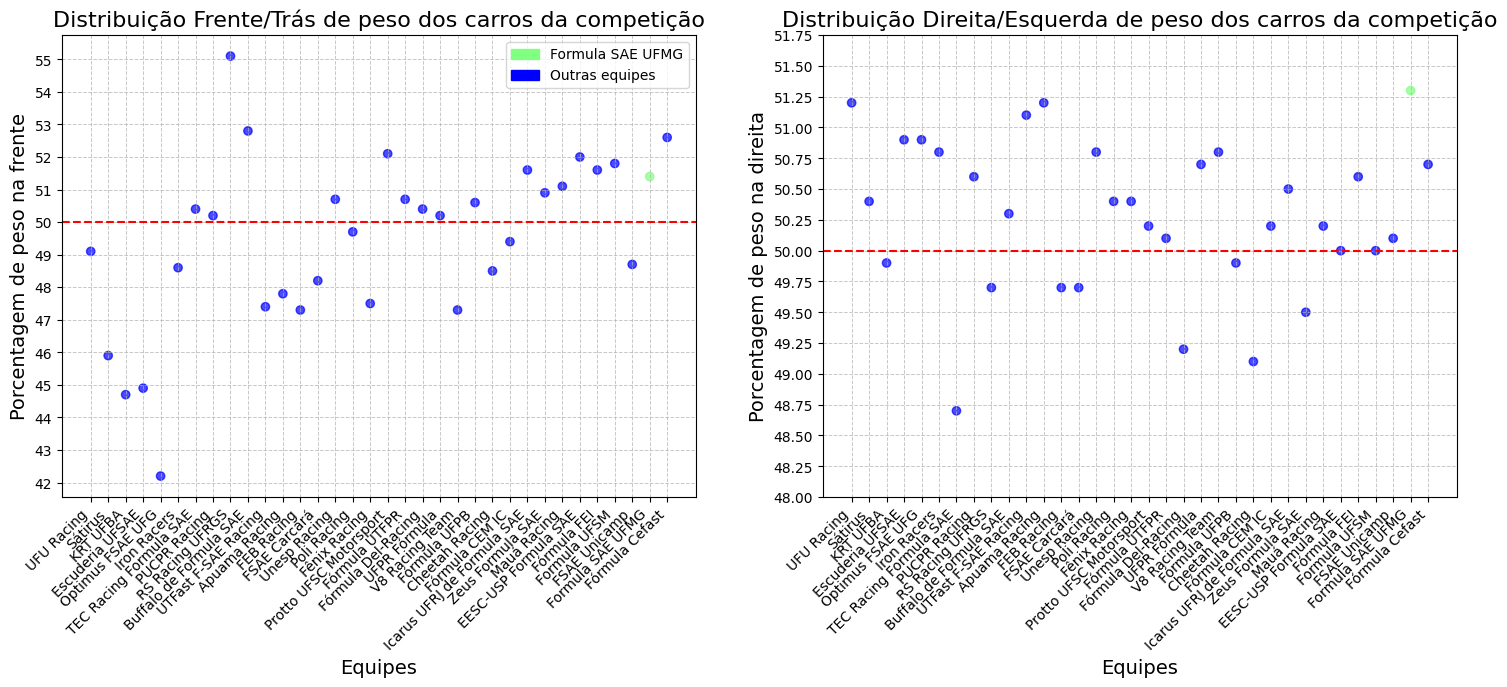

In [9]:
weigthDist = []
labels = []
lateralDist = []
cars_sorted = sorted(cars, key=lambda car: car.position, reverse=True)
for car in cars_sorted:
    weigthDist.append(car.frontDistribution)
    lateralDist.append(car.rightDistribution)
    labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax1=axes[0]
ax2=axes[1]
ax1.scatter(labels, weigthDist, color=colors, alpha=0.7)
ax1.axhline(y=50, color='red', linestyle='--', label='Ponto UFMG')
ax1.set_title('Distribuição Frente/Trás de peso dos carros da competição', fontsize=16)
ax1.set_xlabel('Equipes', fontsize=14)
ax1.set_ylabel('Porcentagem de peso na frente', fontsize=14)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.set_yticks(np.arange(42, 56, 1))
ax1.legend(handles=legend_elements, loc='best')

ax2.scatter(labels, lateralDist, color=colors, alpha=0.7)
ax2.axhline(y=50, color='red', linestyle='--', label='Ponto UFMG')
ax2.set_title('Distribuição Direita/Esquerda de peso dos carros da competição', fontsize=16)
ax2.set_xlabel('Equipes', fontsize=14)
ax2.set_ylabel('Porcentagem de peso na direita', fontsize=14)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.set_yticks(np.arange(48, 52, 0.25))
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]

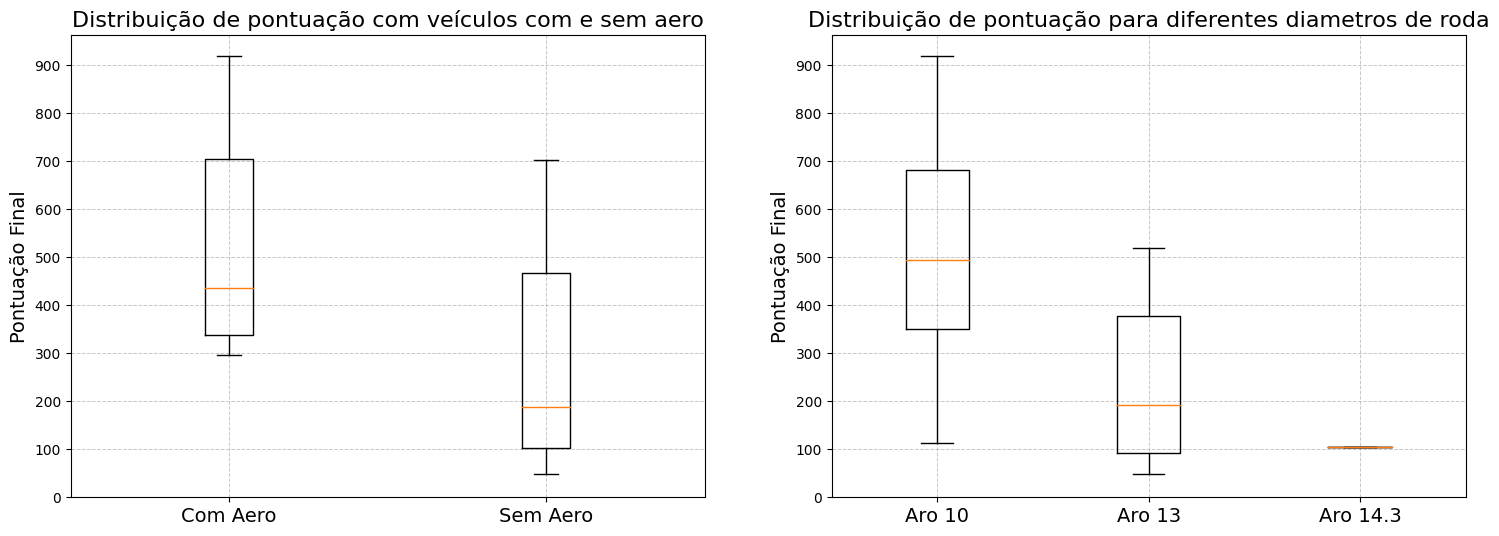

In [10]:
nonAeroScores = []
aeroScore = []
a10 = []
a13 = []
a143 = []
weight = []
points = []
dinamicEventsPoints = []
nonZeroPointsWeight = []

for car in cars:
    if car.wings:
        aeroScore.append(car.getFinalScore())
    else:
        nonAeroScores.append(car.getFinalScore())
    if car.wheel == 10:
        a10.append(car.getFinalScore())
    elif car.wheel == 13:
        a13.append(car.getFinalScore())
    elif car.wheel == 14.3:
        a143.append(car.getFinalScore())
    weight.append(car.weight)
    points.append(car.getFinalScore())
    if car.getDynamicScore() >0:
        nonZeroPointsWeight.append(car.weight)
        dinamicEventsPoints.append(car.getDynamicScore())

# fig, axes = plt.subplots(2,2,figsize=(20,12))
# plt.subplots_adjust(hspace=0.3) 
# ax1, ax2 = axes[0]
# ax3, ax4 = axes[1]

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(18,6))
plt.subplots_adjust(hspace=0.3) 
ax1, ax2


ax1.boxplot([aeroScore,nonAeroScores])
ax1.set_title('Distribuição de pontuação com veículos com e sem aero', fontsize=16)
ax1.set_ylabel("Pontuação Final",fontsize = 14)
ax1.set_xticklabels(["Com Aero","Sem Aero"],fontsize = 14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.set_yticks(np.arange(0, 1000, 100))

ax2.boxplot([a10,a13,a143])
ax2.set_title('Distribuição de pontuação para diferentes diametros de roda', fontsize=16)
ax2.set_ylabel("Pontuação Final",fontsize = 14)
ax2.set_xticklabels(["Aro 10","Aro 13","Aro 14.3"],fontsize = 14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.set_yticks(np.arange(0, 1000, 100))


# slope, intercept, r_value, p_value, std_err = linregress(weight,points)
# regression_line = slope * np.array(nonZeroPointsWeight) + intercept
# correlation_matrix = np.corrcoef(weight, points)
# correlation_coefficient = correlation_matrix[0, 1]
# ax3.scatter(weight,points)
# ax3.set_title(f"Correlação entre pontuação final e peso do carro \n coeficiente de correlação {correlation_coefficient:.3f}  \n slope: {slope:.3f}")
# ax3.set_ylabel("Pontuação Final",fontsize = 14)
# ax3.plot(nonZeroPointsWeight, regression_line, color='red', label=f'Regressão linear (R²={r_value**2:.3f})')
# ax3.legend(fontsize = 15)
# ax3.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
# ax3.tick_params(axis='y', labelsize=15)
# ax3.tick_params(axis='x', labelsize=15)

# slope, intercept, r_value, p_value, std_err = linregress(nonZeroPointsWeight, dinamicEventsPoints)
# regression_line = slope * np.array(nonZeroPointsWeight) + intercept
# correlation_matrix = np.corrcoef(nonZeroPointsWeight,dinamicEventsPoints)
# correlation_coefficient = correlation_matrix[0, 1]
# ax4.scatter(nonZeroPointsWeight,dinamicEventsPoints)
# ax4.set_title(f"Correlação entre pontuação dos eventos dinamicos e peso do carro \n coeficiente de correlação {correlation_coefficient:.3f} \n slope: {slope:.3f}")
# ax4.set_ylabel("Pontuação eventos dinamicos",fontsize = 14)
# ax4.plot(nonZeroPointsWeight, regression_line, color='red', label=f'Regressão linear (R²={r_value**2:.3f})')
# ax4.legend(fontsize = 15)
# ax4.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
# ax4.tick_params(axis='y', labelsize=15)
# ax4.tick_params(axis='x', labelsize=15)


C:\Users\savic\AppData\Local\Temp\ipykernel_312\1255324363.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


[]

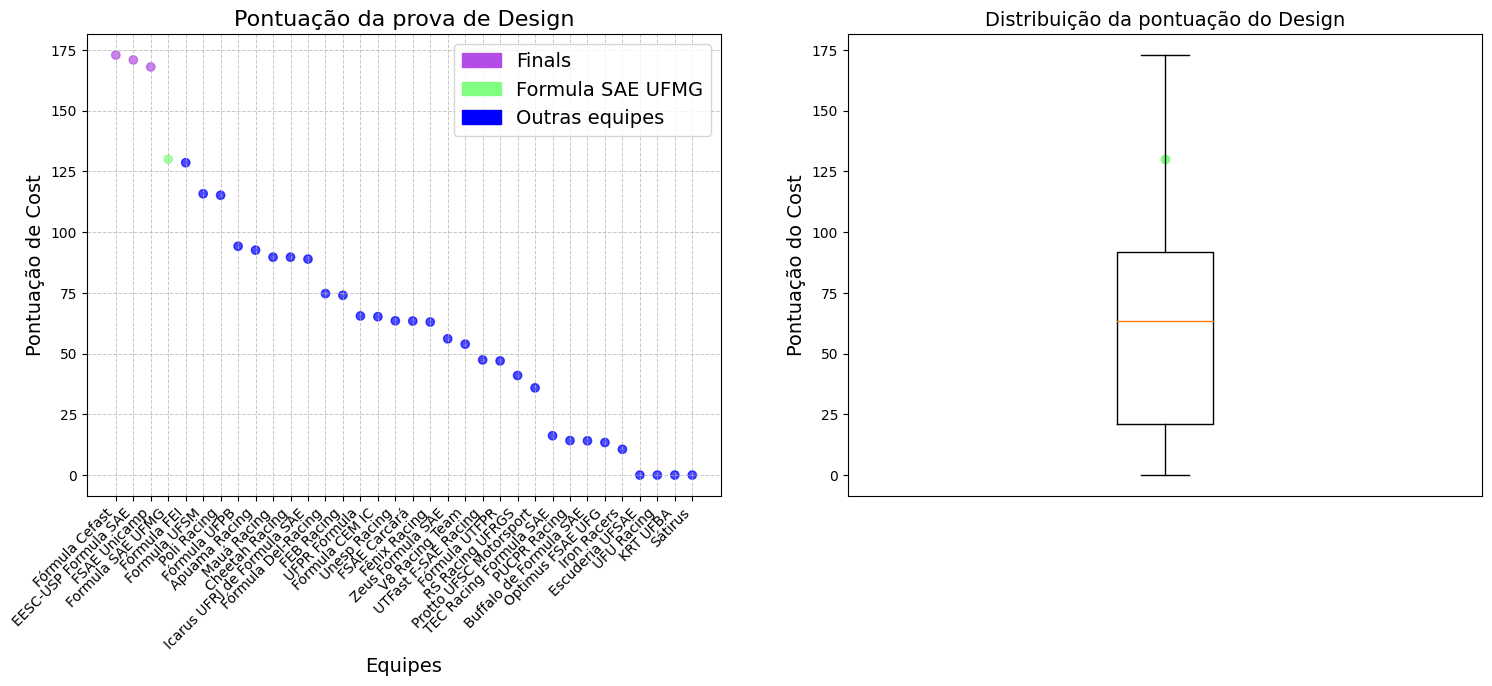

In [11]:
designPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.design.total_points, reverse=True)
for car in cars_sorted:
    designPoints.append(car.design.total_points)
    labels.append(car.name)
finalTeams = [cefet.name,unicamp.name,eesc.name]
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" 
          else [0.7, 0.3, 0.9] if car.name in finalTeams
          else 'blue' for car in cars_sorted]
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, designPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação da prova de Design', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de Cost', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
legend_elements = [
    patches.Patch(color=[0.7, 0.3, 0.9], label='Finals'),
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]
ax.legend(handles=legend_elements, loc='best',fontsize =14)

ax2.boxplot(designPoints)
ax2.scatter([1],[ufmg.design.total_points], color = [0.5, 1, 0.5])
ax2.set_ylabel("Pontuação do Cost", fontsize = 14)
ax2.set_title("Distribuição da pontuação do Design",fontsize = 14)
ax2.set_xticks([])


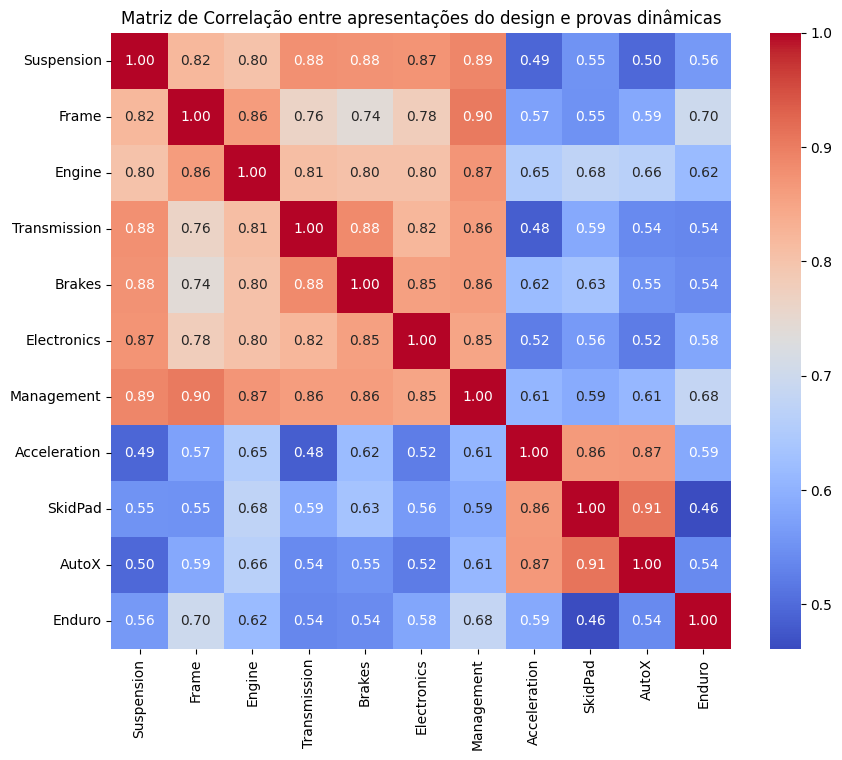

In [12]:
data = pd.DataFrame({
    "Suspension": [car.design.suspension for car in cars],
    "Frame": [car.design.frame for car in cars],
    "Engine": [car.design.engine for car in cars],
    "Transmission": [car.design.transmission for car in cars],
    "Brakes": [car.design.brakes for car in cars],
    "Electronics": [car.design.electronics for car in cars],
    "Management": [car.design.management for car in cars],
    "Acceleration":[car.acceleration.score for car in cars],
    "SkidPad": [car.skidPad.score for car in cars],
    "AutoX": [car.autoX.score for car in cars],
    "Enduro": [car.enduro.points for car in cars],
})

# Calculando a matriz de correlação
correlation_matrix = data.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre apresentações do design e provas dinâmicas')
plt.show()

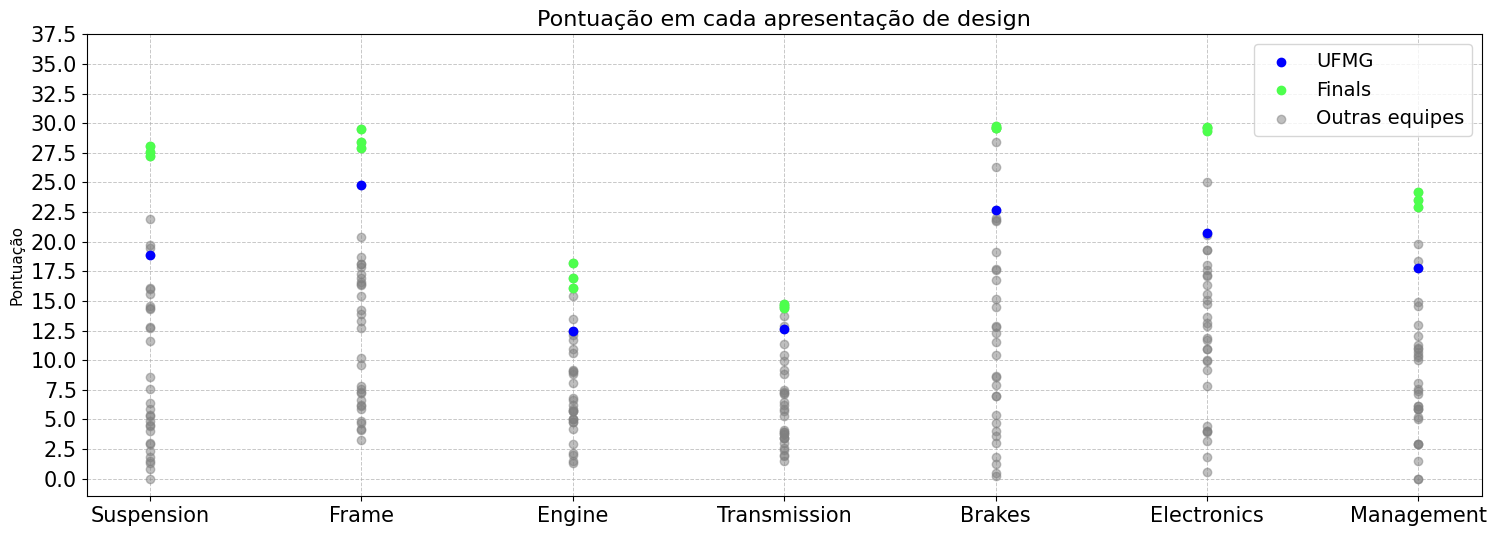

In [13]:
aspects = ["Suspension", "Frame", "Engine", "Transmission", "Brakes", "Electronics", "Management"]
ufmg_scores = ufmg.getDesignScores()
cefet_scores = cefet.getDesignScores()
eesc_scores = eesc.getDesignScores()
unicamp_scores = unicamp.getDesignScores()
other_scores = {
    "Suspension": [car.design.suspension for car in cars],
    "Frame": [car.design.frame for car in cars],
    "Engine": [car.design.engine for car in cars],
    "Transmission": [car.design.transmission for car in cars],
    "Brakes": [car.design.brakes for car in cars],
    "Electronics": [car.design.electronics for car in cars],
    "Management": [car.design.management for car in cars],
}

fig, ax = plt.subplots(figsize=(18, 6))

# Plotar a pontuação da UFMG
ax.scatter(aspects, ufmg_scores, color='blue', label='UFMG', zorder=5)
ax.scatter(aspects, cefet_scores, color=[0.3,1,0.3], label='Finals', zorder=5)
ax.scatter(aspects, eesc_scores, color=[0.3,1,0.3], label='', zorder=5)
ax.scatter(aspects, unicamp_scores, color=[0.3,1,0.3], label='', zorder=5)
# Plotar as pontuações das outras equipes
for aspect in aspects:
    ax.scatter([aspect] * len(other_scores[aspect]), other_scores[aspect], color='gray', alpha=0.5, label='Outras equipes' if aspect == aspects[0] else "", zorder=4)

# Adicionar rótulos e título
ax.set_ylabel('Pontuação',fontsize=11)
ax.set_title('Pontuação em cada apresentação de design',fontsize=16)
ax.legend(fontsize = 14)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_yticks(np.arange(0, 40, 2.5))


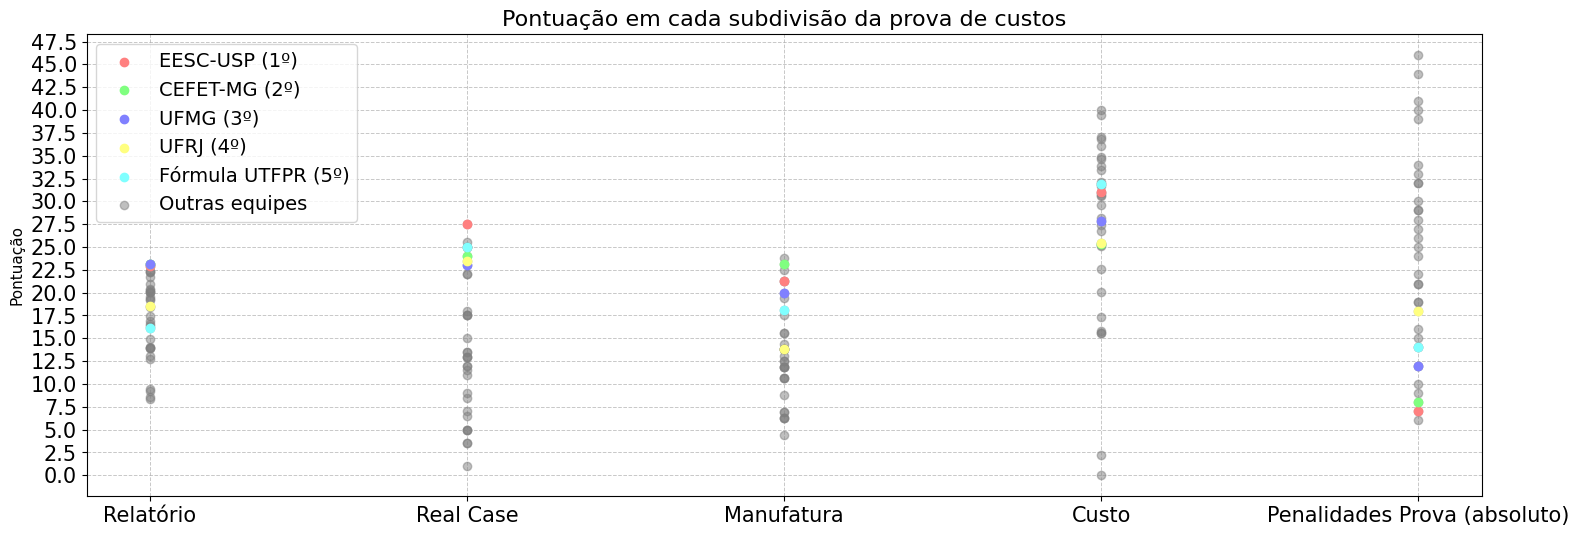

In [37]:
aspects = ["Relatório", "Real Case", "Manufatura", "Custo", "Penalidades Prova (absoluto)"]
ufmg_scores = ufmg.getCostScores()
cefet_scores = cefet.getCostScores()
eesc_scores = eesc.getCostScores()
icarus_scores = unicamp.getCostScores()
utfpr_scores = utfpr.getCostScores()
other_scores = {
    "Relatório": [car.cost.report for car in cars],
    "Real Case": [car.cost.real_case for car in cars],
    "Manufatura": [car.cost.manufacture for car in cars],
    "Custo": [car.cost.cost for car in cars],
    "Penalidades Prova (absoluto)": [abs(car.cost.penalitiesProva) for car in cars],
}

fig, ax = plt.subplots(figsize=(18, 6))

# Plotar a pontuação da UFMG
ax.scatter(aspects, eesc_scores, color=[1, 0.5, 0.5], label='EESC-USP (1º)', zorder=5)   # Pastel red
ax.scatter(aspects, cefet_scores, color=[0.5, 1, 0.5], label='CEFET-MG (2º)', zorder=5)  # Pastel green
ax.scatter(aspects, ufmg_scores, color=[0.5, 0.5, 1], label='UFMG (3º)', zorder=5)   # Pastel blue
ax.scatter(aspects, icarus_scores, color=[1, 1, 0.5], label='UFRJ (4º)', zorder=5)     # Pastel yellow
ax.scatter(aspects, utfpr_scores, color=[0.5, 1, 1], label='Fórmula UTFPR (5º)', zorder=5)   # Pastel cyan





# Plotar as pontuações das outras equipes
for aspect in aspects:
    ax.scatter([aspect] * len(other_scores[aspect]), other_scores[aspect], color='gray', alpha=0.5, label='Outras equipes' if aspect == aspects[0] else "", zorder=4)

# Adicionar rótulos e título
ax.set_ylabel('Pontuação',fontsize=11)
ax.set_title('Pontuação em cada subdivisão da prova de custos',fontsize=16)
ax.legend(fontsize = 14)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_yticks(np.arange(0, 50, 2.5))

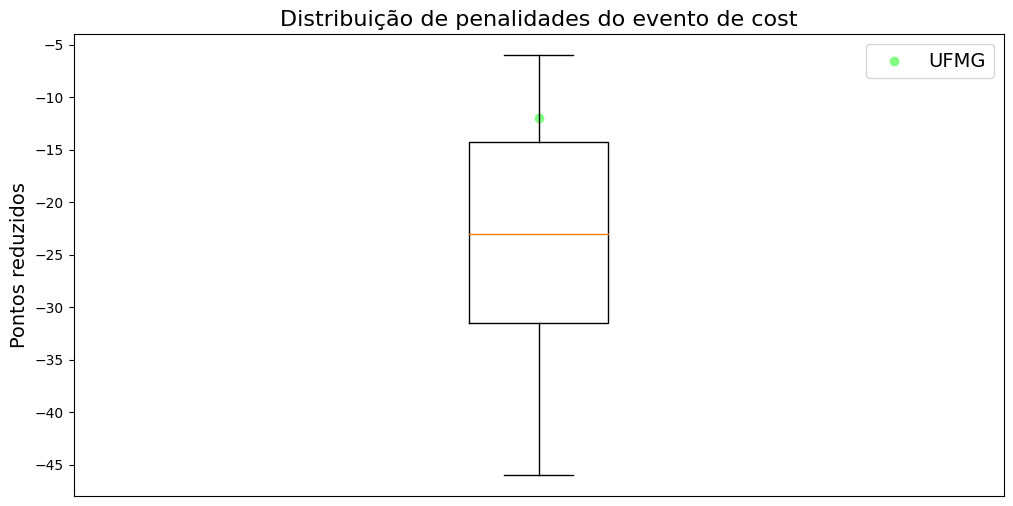

In [50]:
penalities = [car.cost.penalitiesProva for car in cars]

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(penalities)
ax.scatter([1],[ufmg.cost.penalitiesProva], color = [0.5, 1, 0.5],label = "UFMG")
ax.set_title("Distribuição de penalidades do evento de cost",fontsize = 16)
ax.set_ylabel("Pontos reduzidos",fontsize = 14)
ax.set_xticks([])
ax.legend(fontsize = 14)

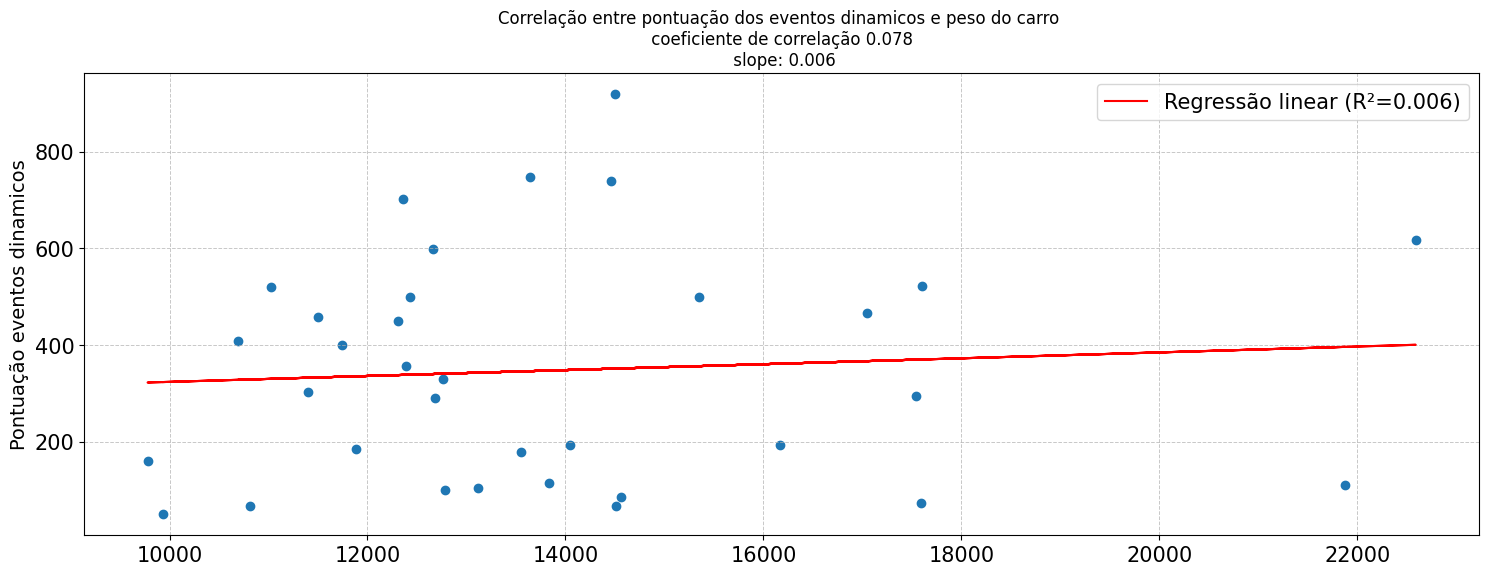

In [41]:
price = []
Points = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.getFinalScore(), reverse=True)
for car in cars_sorted:
    price.append(car.cost.price)
    Points.append(car.getFinalScore())
    labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]

slope, intercept, r_value, p_value, std_err = linregress(price, Points)
regression_line = slope * np.array(price) + intercept
correlation_matrix = np.corrcoef(price,Points)
correlation_coefficient = correlation_matrix[0, 1]


fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter(price,Points)
ax.set_title(f"Correlação entre pontuação dos eventos dinamicos e peso do carro \n coeficiente de correlação {correlation_coefficient:.3f} \n slope: {slope:.3f}")
ax.set_ylabel("Pontuação eventos dinamicos",fontsize = 14)
ax.plot(price, regression_line, color='red', label=f'Regressão linear (R²={r_value**2:.3f})')
ax.legend(fontsize = 15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)


C:\Users\savic\AppData\Local\Temp\ipykernel_312\1555239934.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


[]

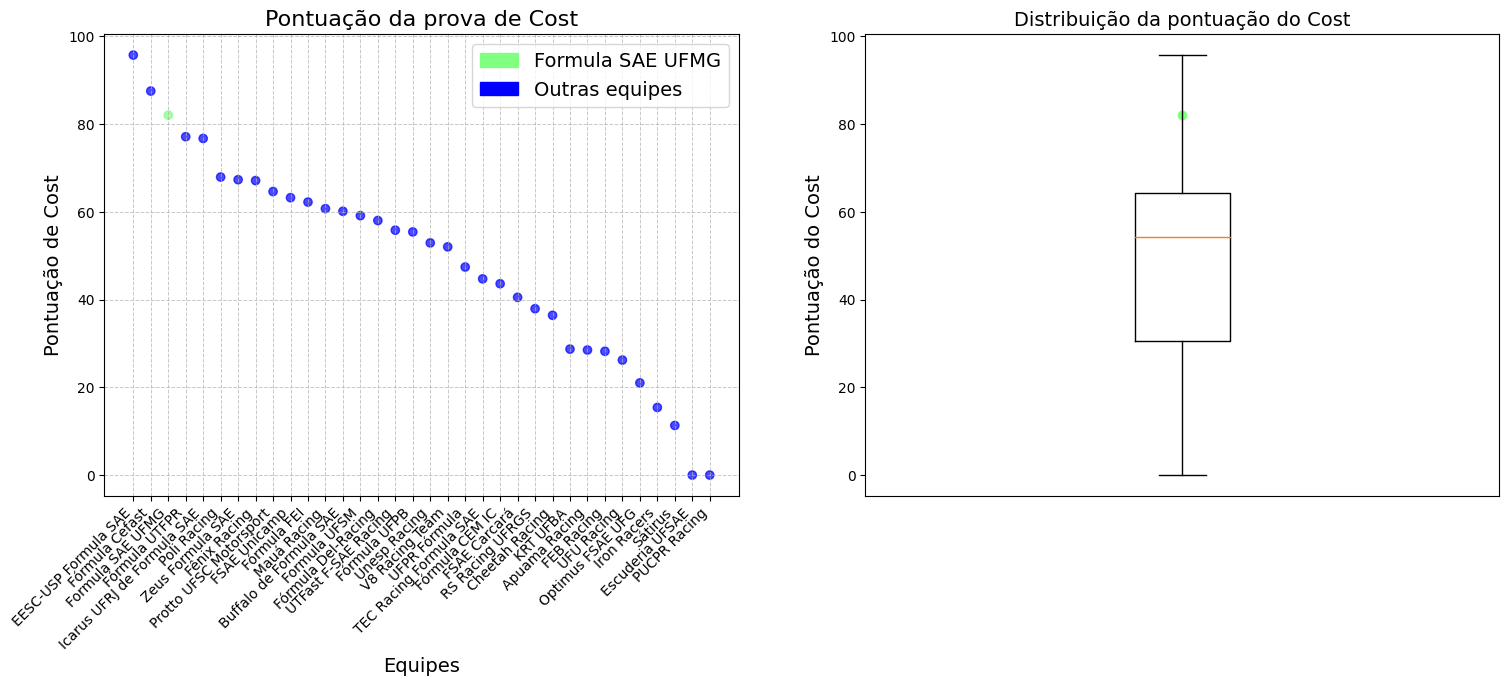

In [15]:
costPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.cost.points, reverse=True)
for car in cars_sorted:
    costPoints.append(car.cost.points)
    labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, costPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação da prova de Cost', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de Cost', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]
ax.legend(handles=legend_elements, loc='best',fontsize =14)

ax2.boxplot(costPoints)
ax2.scatter([1],[ufmg.cost.points], color = [0.5, 1, 0.5])
ax2.set_ylabel("Pontuação do Cost", fontsize = 14)
ax2.set_title("Distribuição da pontuação do Cost",fontsize = 14)
ax2.set_xticks([])


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Relatório'),
  Text(0, 1.5, 'Real Case'),
  Text(0, 2.5, 'Manufatura'),
  Text(0, 3.5, 'Custo'),
  Text(0, 4.5, 'Penalidades Prova (absoluto)')])

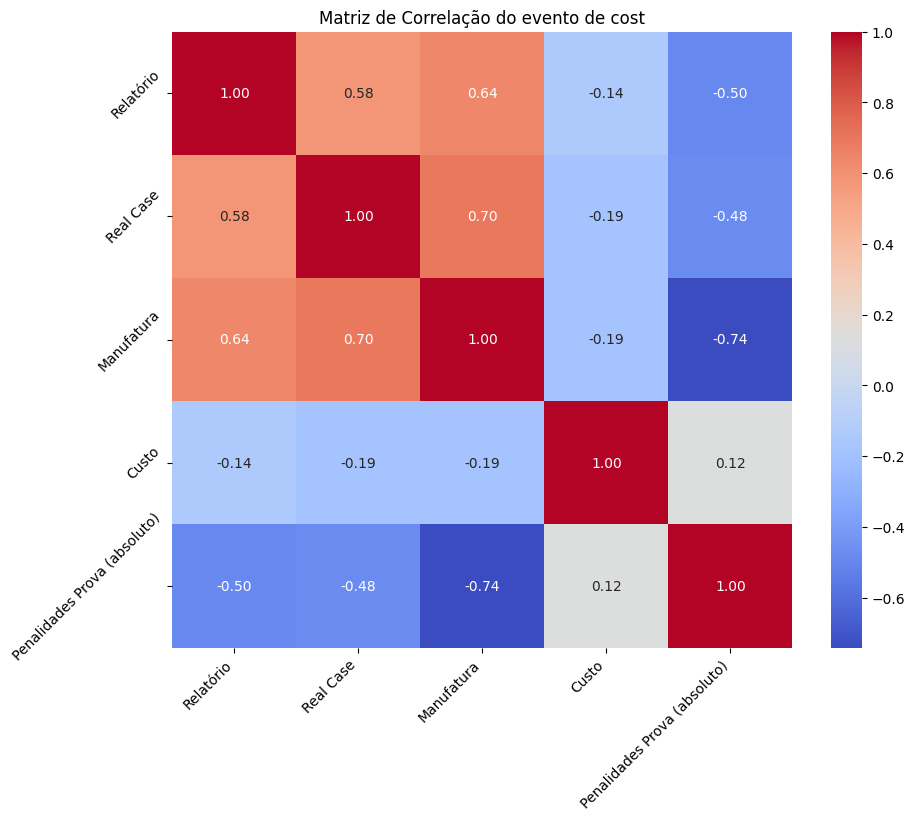

In [55]:
data = pd.DataFrame({
    "Relatório": [car.cost.report for car in cars],
    "Real Case": [car.cost.real_case for car in cars],
    "Manufatura": [car.cost.manufacture for car in cars],
    "Custo": [car.cost.cost for car in cars],
    "Penalidades Prova (absoluto)": [abs(car.cost.penalitiesProva) for car in cars],
})

# Calculando a matriz de correlação
correlation_matrix = data.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do evento de cost')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')


C:\Users\savic\AppData\Local\Temp\ipykernel_312\2934856693.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


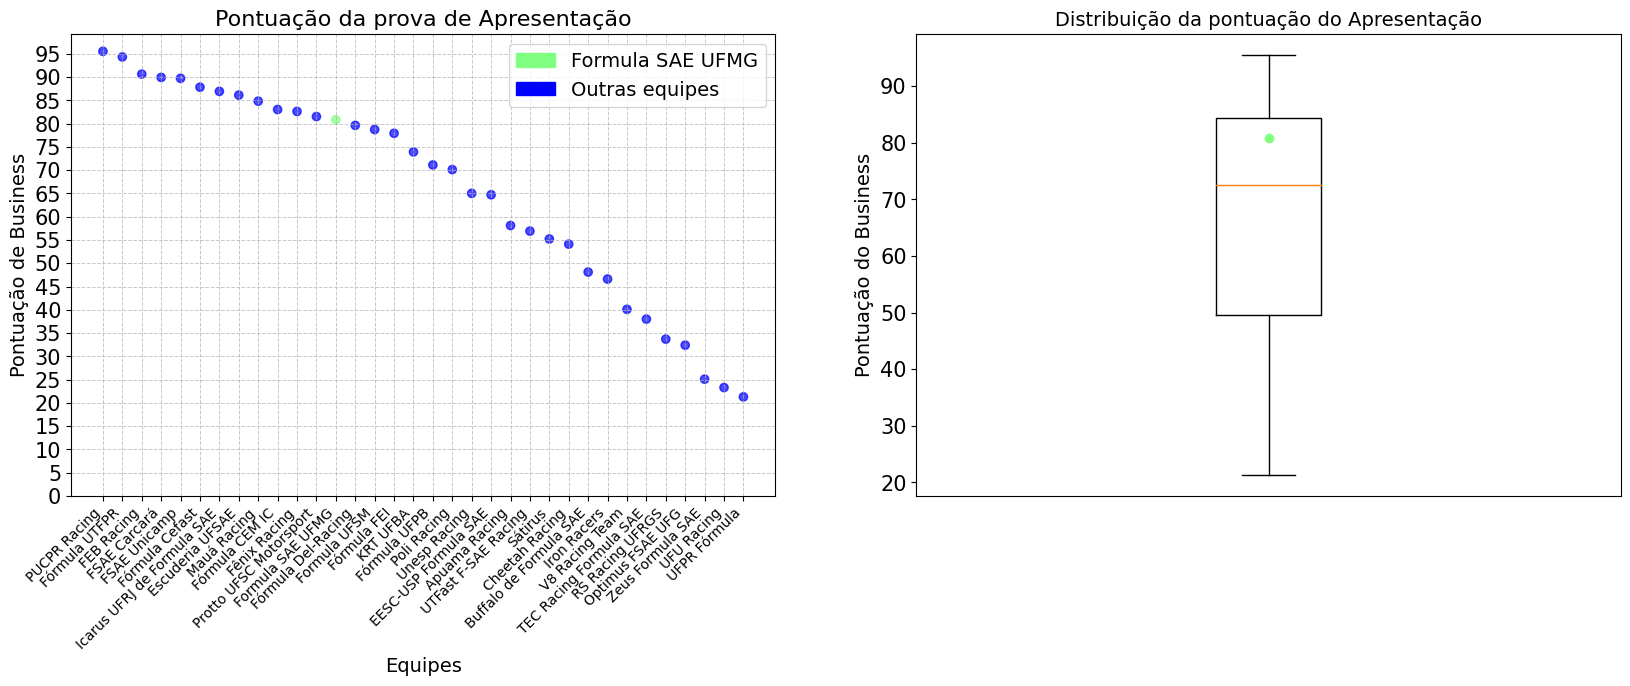

In [63]:
businessPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.business.score, reverse=True)
for car in cars_sorted:
    businessPoints.append(car.business.score)
    labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted]
fig, axes = plt.subplots(1,2,figsize=(20,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, businessPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação da prova de Apresentação', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de Business', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=10)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]
ax.set_yticks(np.arange(0, 100, 5))
ax.legend(handles=legend_elements, loc='best',fontsize =14)
ax2.boxplot(businessPoints)
ax2.scatter([1],[ufmg.business.score], color = [0.5, 1, 0.5])
ax2.set_ylabel("Pontuação do Business", fontsize = 14)
ax2.set_title("Distribuição da pontuação do Apresentação",fontsize = 14)
ax2.set_xticks([])
ax2.tick_params(axis='y', labelsize=15)


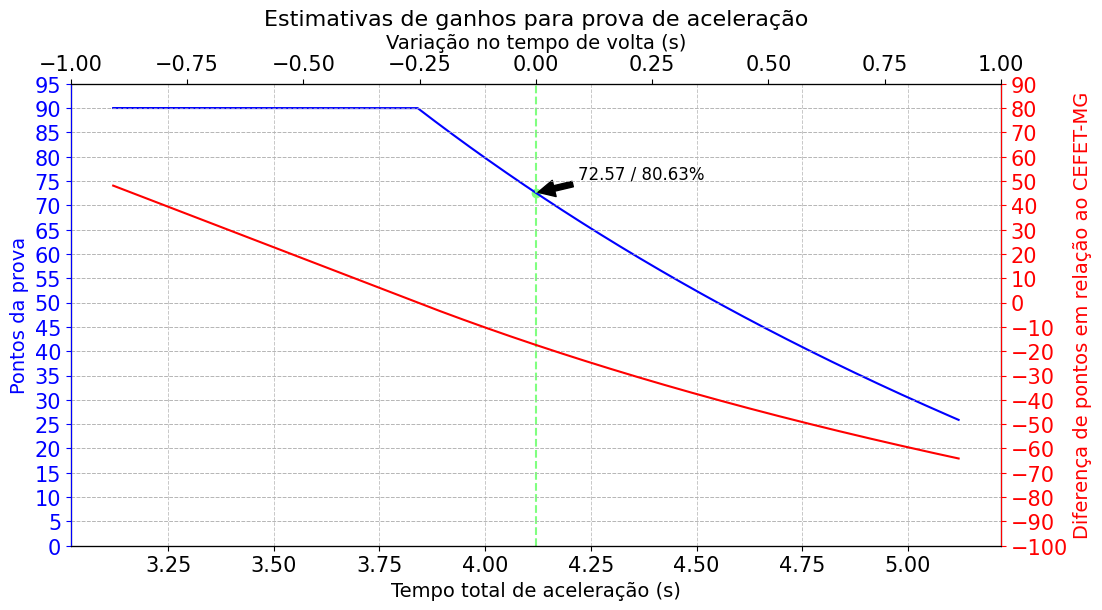

In [165]:
winner = sorted(cars, key=lambda car: car.acceleration.score, reverse=True)[0]
reducedTime = np.linspace(-1, 1, num=10000)
calculatedGains = []
total_time = ufmg.getBestAccelTime() + reducedTime
cefetPoints = []
for time in reducedTime:
    estimatedTime = ufmg.getBestAccelTime() + time
    estimatedScore = calculateAcelScore(winner.getBestAccelTime(), estimatedTime)
    calculatedGains.append(estimatedScore)
    if winner.getBestAccelTime() >= estimatedTime:
        cefetPoints.append(calculateAcelScore(estimatedTime,winner.getBestAccelTime()))
    else:
        cefetPoints.append(calculateAcelScore(winner.getBestAccelTime(),winner.getBestAccelTime()))
calculatedGains = np.array(calculatedGains)
cefetPoints = np.array(cefetPoints)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot principal com eixo y azul
ax1.plot(total_time, calculatedGains, color="blue")
ax1.scatter(ufmg.getBestAccelTime(), [ufmg.acceleration.score], color=[0.5, 1, 0.5])
scatter_value = ufmg.acceleration.score

# Configurações do eixo principal
ax1.set_title("Estimativas de ganhos para prova de aceleração", fontsize=16)
ax1.set_ylabel("Pontos da prova",fontsize = 14)
ax1.set_xlabel("Tempo total de aceleração (s)",fontsize = 14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.annotate(f'{scatter_value:.2f} / {scatter_value/90*100:.2f}%', 
             xy=(ufmg.getBestAccelTime(), scatter_value), 
             xytext=(30, 10), 
             textcoords='offset points', 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black')

ax1.tick_params(axis='y', colors='blue')
ax1.yaxis.label.set_color('blue')
ax1.axvline(ufmg.getBestAccelTime(),color=[0.5, 1, 0.5],linestyle = "--")

# Criando o segundo eixo x e segundo eixo y
ax2 = ax1.twiny()
ay2 = ax1.twinx()

# Plot secundário com eixo y vermelho
ay2.plot(total_time, calculatedGains - cefetPoints, color="red")
ay2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ay2.set_ylabel("Diferença de pontos em relação ao CEFET-MG", color='red',fontsize = 14)
ay2.tick_params(axis='y', colors='red')
ay2.yaxis.label.set_color('red')
ay2.spines['right'].set_color('red')
ay2.spines['left'].set_color('blue')

# Configuração do segundo eixo x
ax2.set_xlabel("Variação no tempo de volta (s)",fontsize = 14)
ax2.set_xlim(reducedTime[0], reducedTime[-1])

ax1.set_yticks(np.arange(0, 100,5))
ay2.set_yticks(np.arange(-100, 100, 10))


ax1.tick_params(labelsize=15)
ay2.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)


C:\Users\savic\AppData\Local\Temp\ipykernel_312\686535301.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


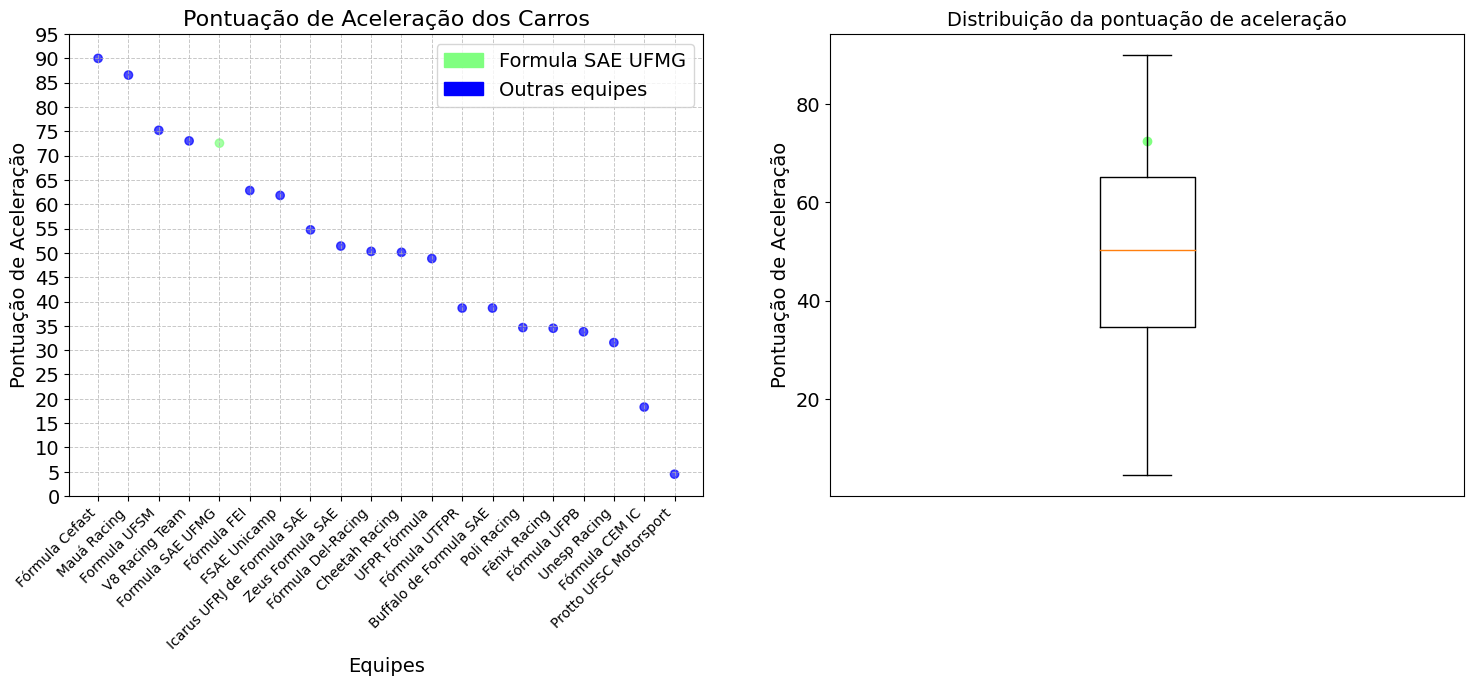

In [170]:
accelerationPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.acceleration.score, reverse=True)
for car in cars_sorted:
    if car.acceleration.score > 0:
        accelerationPoints.append(car.acceleration.score)
        labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted if car.acceleration.score > 0]
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, accelerationPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação de Aceleração dos Carros', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de Aceleração', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.boxplot(accelerationPoints)
ax2.scatter([1],[ufmg.acceleration.score], color = [0.5, 1, 0.5])
ax2.set_ylabel("Pontuação de Aceleração", fontsize = 14)
ax2.set_title("Distribuição da pontuação de aceleração",fontsize = 14)
ax2.set_xticks([])
ax.tick_params(axis="y",labelsize=14)
ax2.tick_params(axis="y",labelsize=14)
ax.set_yticks(np.arange(0, 100,5))
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color='blue', label='Outras equipes'),
]
ax.legend(handles=legend_elements, loc='best',fontsize =14)

0.08702681579068976


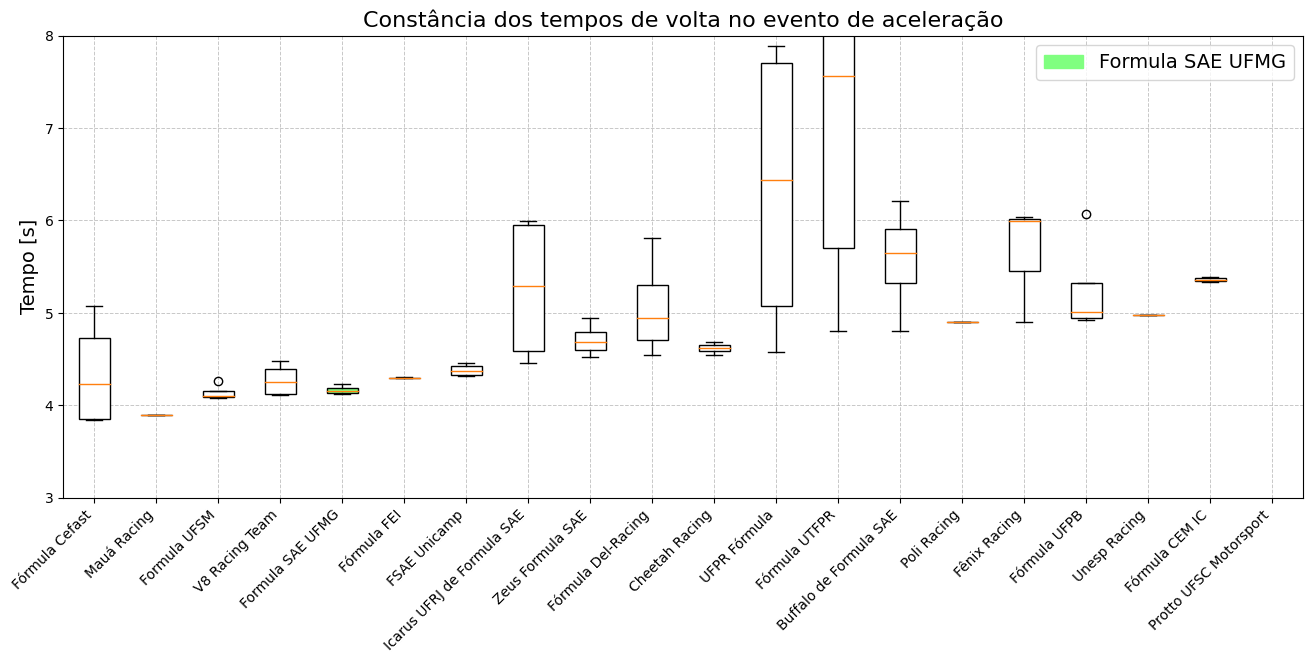

In [179]:
acelTimes = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.acceleration.score, reverse=True)
for car in cars_sorted:
    if car.acceleration.score > 0:
        acelTimes.append([vector for vector in car.getCorrectedAccelTimes() if vector is not None])
        labels.append(car.name)
colors = colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'white' for car in cars_sorted if car.acceleration.score > 0]

print(statistics.stdev(ufsm.getCorrectedAccelTimes()))

fig, ax = plt.subplots(figsize=(16, 6))
box = ax.boxplot(acelTimes,patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels,rotation=45,ha='right')
ax.set_title("Constância dos tempos de volta no evento de aceleração",fontsize = 16)
ax.set_ylim([3,8])
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_ylabel("Tempo [s]",fontsize =14)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
]
ax.legend(handles=legend_elements,fontsize = 14)

5.79


Text(0.1, 48.61, '48.51 / 64.68%')

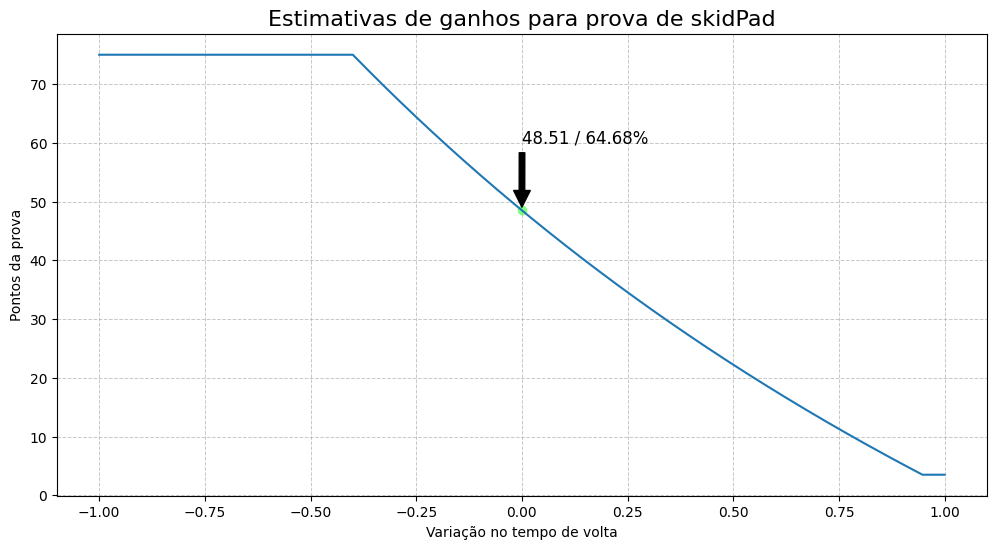

In [20]:
winner = sorted(cars, key=lambda car: car.skidPad.score, reverse=True)[0]
reducedTime = np.linspace(-1, 1, num=10000)
calculatedGains = []
print(ufmg.getBestSkidPadTime())
for time in reducedTime:
    estimatedTime = ufmg.getBestSkidPadTime()+time
    calculatedGains.append(calculateSkidScore(winner.getBestSkidPadTime(),estimatedTime))
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(reducedTime,calculatedGains)
scatter_point = [0]
ax.scatter([0],[ufmg.skidPad.score],color=[0.5,1,0.5])
scatter_value = ufmg.skidPad.score
ax.set_title("Estimativas de ganhos para prova de skidPad",fontsize=16)
ax.set_ylabel("Pontos da prova")
ax.set_xlabel("Variação no tempo de volta")
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.annotate(f'{scatter_value:.2f} / {scatter_value/75*100:.2f}%', 
            xy=(scatter_point[0], scatter_value), 
            xytext=(scatter_point[0] + 0.1, scatter_value + 0.1), 
            textcoords='offset points', 
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='black')

C:\Users\savic\AppData\Local\Temp\ipykernel_312\2582230522.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


[]

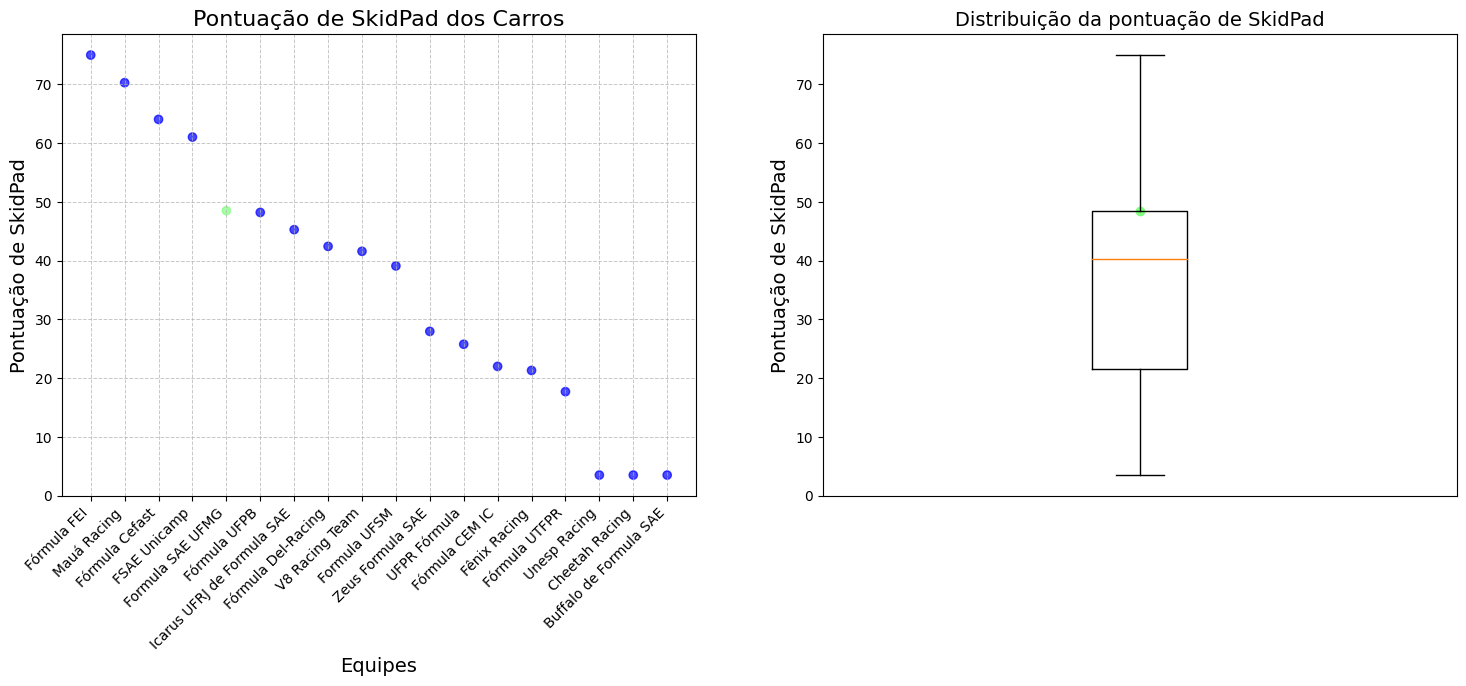

In [21]:
skidPadPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.skidPad.score, reverse=True)
for car in cars_sorted:
    if car.skidPad.score > 0:
        skidPadPoints.append(car.skidPad.score)
        labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted if car.skidPad.score > 0]
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, skidPadPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação de SkidPad dos Carros', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de SkidPad', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.boxplot(skidPadPoints)
ax2.scatter([1],[ufmg.skidPad.score], color = [0.5, 1, 0.5])
ax2.set_ylabel('Pontuação de SkidPad', fontsize=14)
ax2.set_title("Distribuição da pontuação de SkidPad",fontsize = 14)
ax2.set_xticks([])

Text(0, 0.5, 'Tempo [s]')

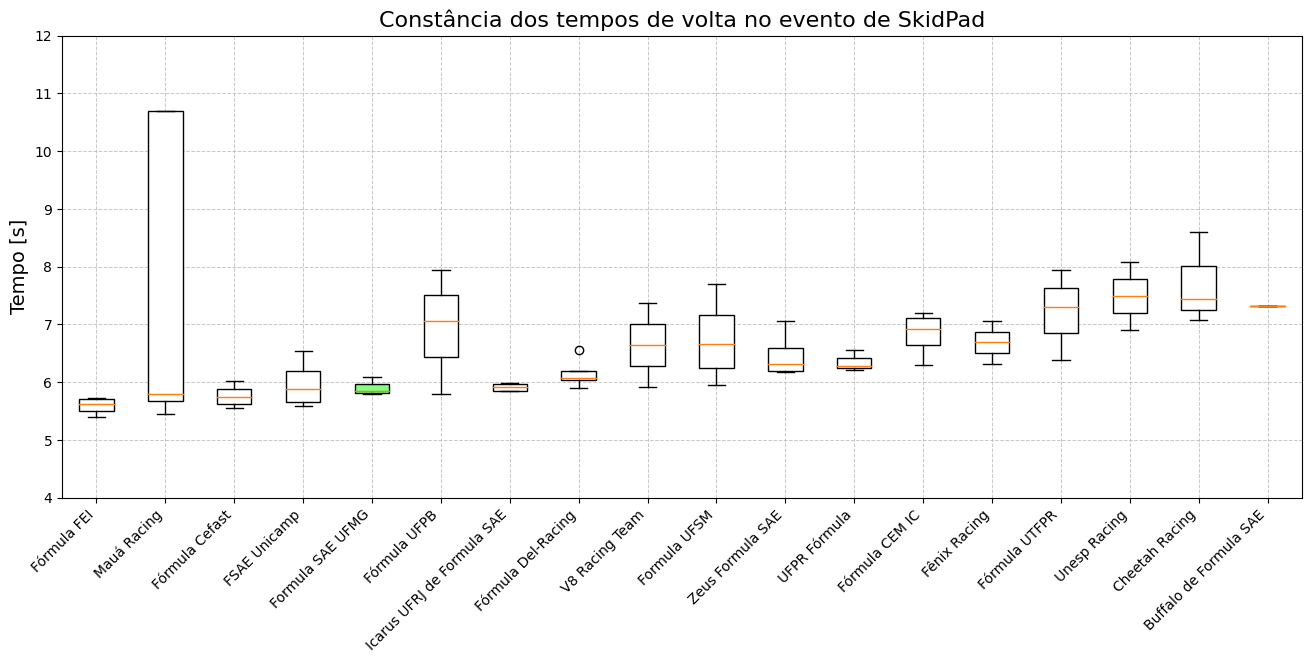

In [22]:
skidTimes = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.skidPad.score, reverse=True)
for car in cars_sorted:
    if car.skidPad.score > 0:
        skidTimes.append([vector for vector in car.getCorrectedSkidTimes() if vector is not None])
        labels.append(car.name)
colors = colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'white' for car in cars_sorted if car.skidPad.score > 0]


fig, ax = plt.subplots(figsize=(16, 6))
box = ax.boxplot(skidTimes,patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels,rotation=45,ha='right')
ax.set_title("Constância dos tempos de volta no evento de SkidPad",fontsize = 16)
ax.set_ylim([4,12])
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_ylabel("Tempo [s]",fontsize =14)

[]

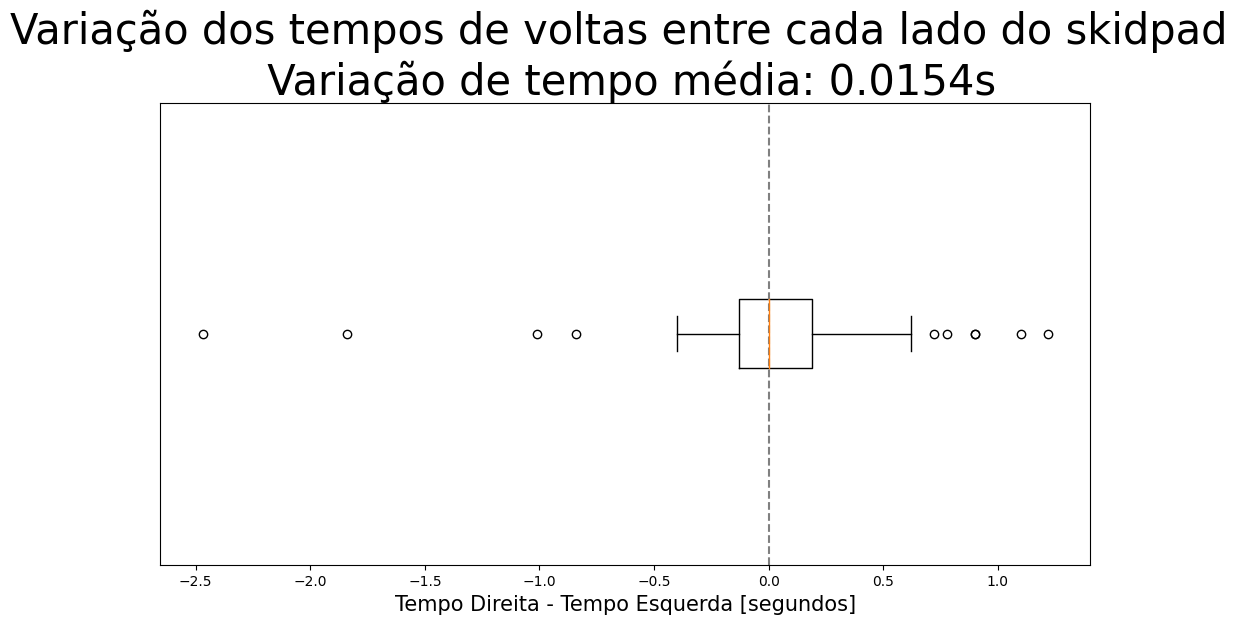

In [23]:
deltasSkid = []
for car in cars:
    for skid in car.skidPad.runs:
        if skid is not None and None not in skid:
            deltasSkid.append(getDeltaSkidPad(skid))
deltasSkid = hampel_filter(deltasSkid)
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(deltasSkid,vert=False)
ax.axvline(x=0, color='gray', linestyle='--')
ax.set_title(f'Variação dos tempos de voltas entre cada lado do skidpad \n Variação de tempo média: {np.mean(deltasSkid):.4f}s',fontsize = 30)
ax.set_xlabel('Tempo Direita - Tempo Esquerda [segundos]',fontsize=15)
ax.set_yticks([])


Text(0, 96.08, '116.08 / 96.73%')

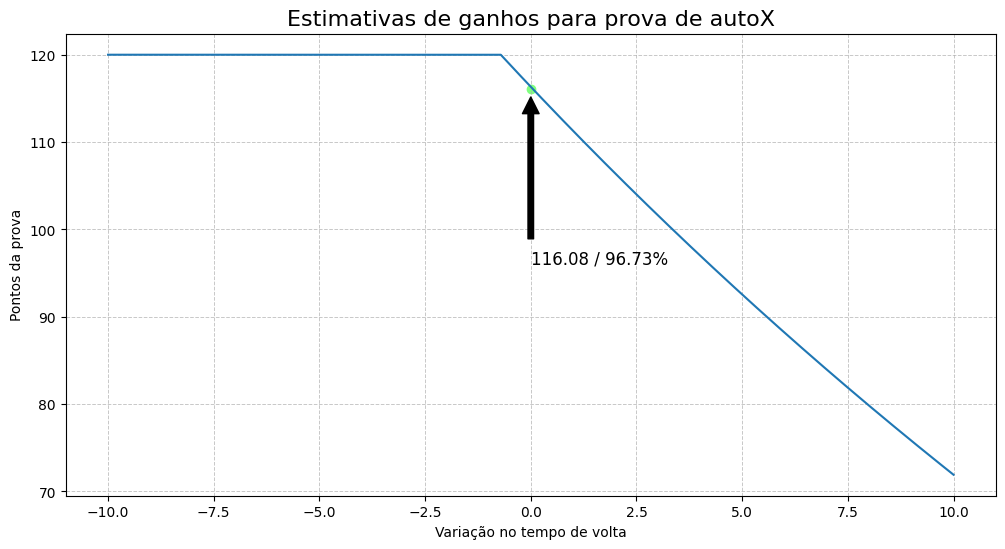

In [24]:
winner = sorted(cars, key=lambda car: car.autoX.score, reverse=True)[0]
reducedTime = np.linspace(-10, 10, num=10000)
calculatedGains = []
for time in reducedTime:
    estimatedTime = ufmg.getBestAutoXTime()+time
    calculatedGains.append(calculateAutoXScore(winner.getBestAutoXTime(),estimatedTime))
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(reducedTime,calculatedGains)
scatter_point = [0]
ax.scatter([0],[ufmg.autoX.score],color=[0.5,1,0.5])
scatter_value = ufmg.autoX.score
ax.set_title("Estimativas de ganhos para prova de autoX",fontsize=16)
ax.set_ylabel("Pontos da prova")
ax.set_xlabel("Variação no tempo de volta")
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.annotate(f'{scatter_value:.2f} / {scatter_value/120*100:.2f}%', 
            xy=(scatter_point[0], scatter_value), 
            xytext=(scatter_point[0], scatter_value - 20),  # Posicione o texto abaixo do ponto
            textcoords='data', 
            arrowprops=dict(facecolor='black', shrink=0.05),  # Use uma seta padrão
            fontsize=12, color='black')

C:\Users\savic\AppData\Local\Temp\ipykernel_312\1731415650.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


Text(0, 0.5, 'Pontuação de SkidPad')

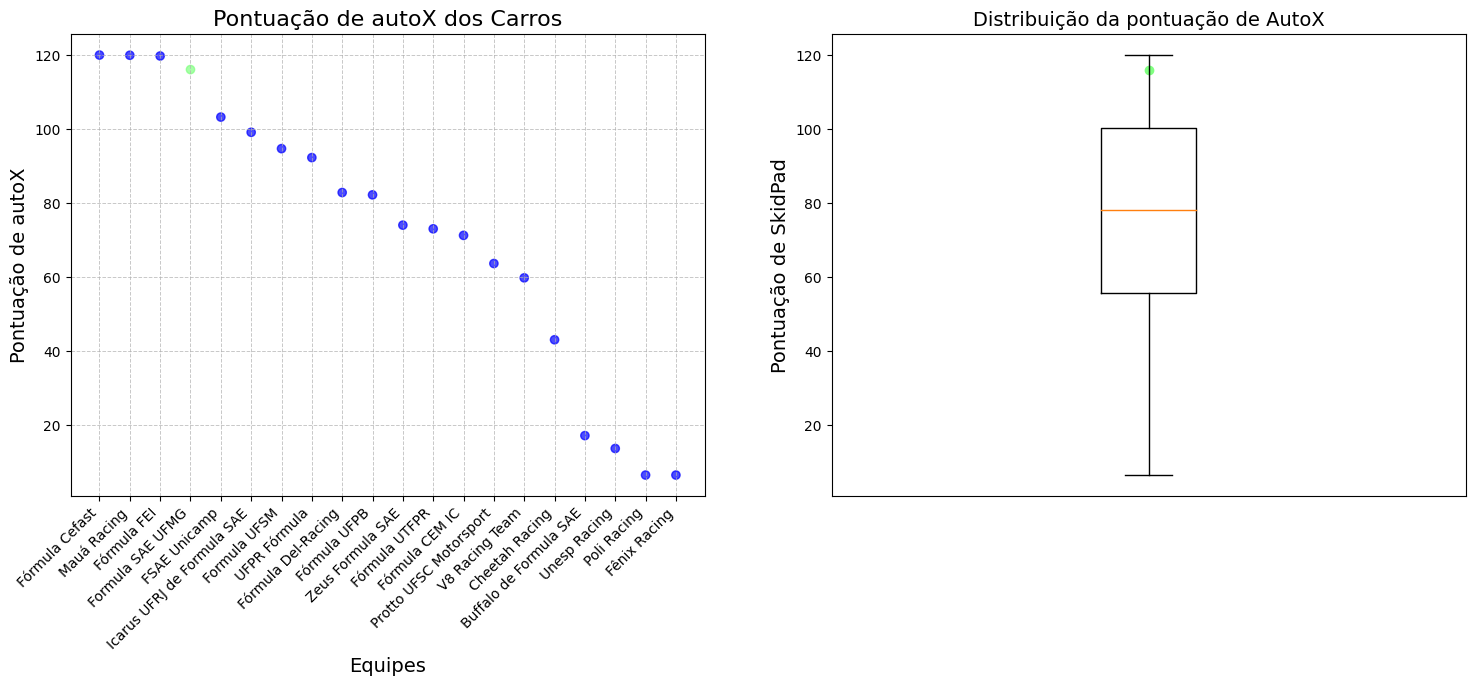

In [25]:
autoXPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.autoX.score, reverse=True)
for car in cars_sorted:
    if car.autoX.score > 0:
        autoXPoints.append(car.autoX.score)
        labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted if car.autoX.score > 0]
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, autoXPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação de autoX dos Carros', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de autoX', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.boxplot(autoXPoints)
ax2.scatter([1],[ufmg.autoX.score], color = [0.5, 1, 0.5])
ax2.set_xticks([])
ax2.set_title("Distribuição da pontuação de AutoX",fontsize = 14)
ax2.set_ylabel('Pontuação de SkidPad', fontsize=14)

Text(0, 0.5, 'Tempo [s]')

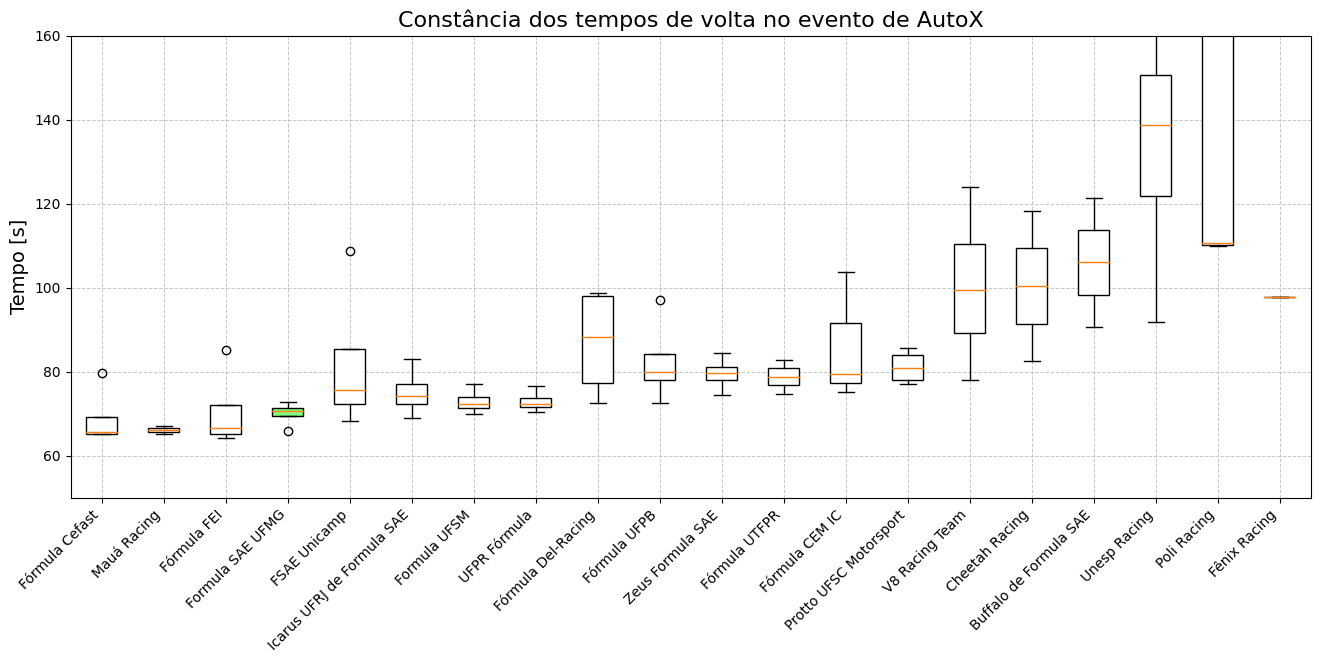

In [26]:
autoXTimes = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.autoX.score, reverse=True)
for car in cars_sorted:
    if car.autoX.score > 0:
        autoXTimes.append([vector for vector in car.getCorrectedAutoXTimes() if vector is not None])
        labels.append(car.name)
colors = colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'white' for car in cars_sorted if car.autoX.score > 0]


fig, ax = plt.subplots(figsize=(16, 6))
box = ax.boxplot(autoXTimes,patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels,rotation=45,ha='right')
ax.set_title("Constância dos tempos de volta no evento de AutoX",fontsize = 16)
ax.set_ylim([50,160])
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_ylabel("Tempo [s]",fontsize =14)

Text(-105, 157.90149622530754, '197.90 / 86.04%')

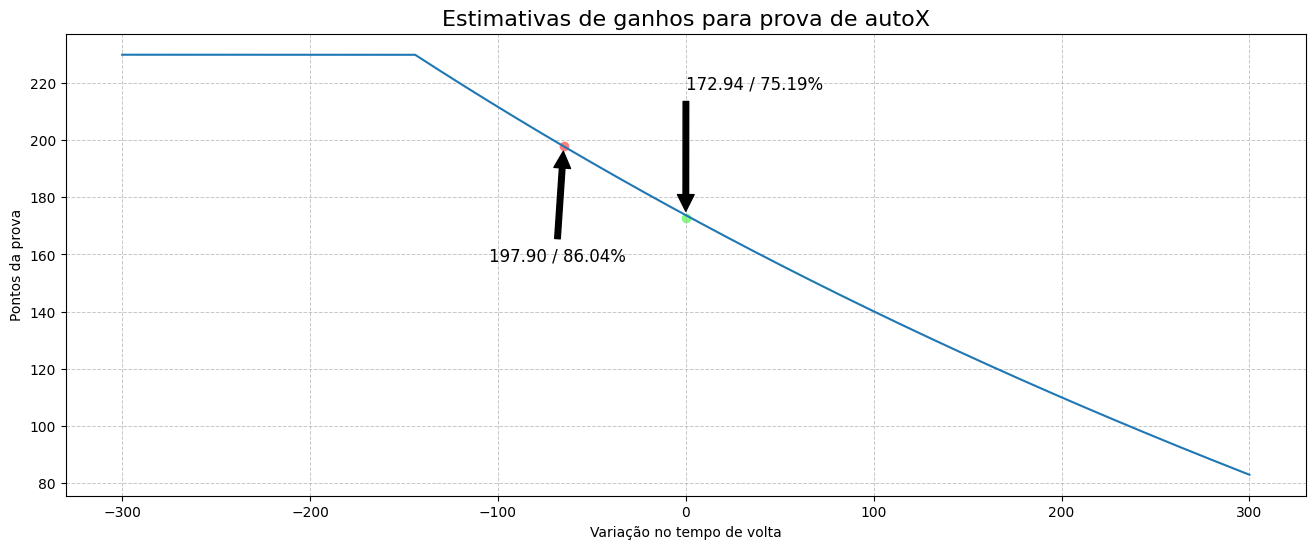

In [27]:
winner = sorted(cars, key=lambda car: car.enduro.points, reverse=True)[0]
reducedTime = np.linspace(-300, 300, num=10000)
calculatedGains = []
for time in reducedTime:
    estimatedTime = ufmg.getEnduroTotalTime()+time
    calculatedGains.append(calculateEnduroScore(winner.getEnduroTotalTime(),estimatedTime,22))
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(reducedTime,calculatedGains)
scatter_point = [0]
ax.scatter([0],[ufmg.enduro.points],color=[0.5,1,0.5])
scatter_value = ufmg.enduro.points
expectedValue = calculateEnduroScore(winner.getEnduroTotalTime(),ufmg.getEnduroTotalTime()-ufmg.enduro.penalities,22)
ax.scatter([-ufmg.enduro.penalities],[expectedValue],color=[1,0.5,0.5])
ax.set_title("Estimativas de ganhos para prova de autoX",fontsize=16)
ax.set_ylabel("Pontos da prova")
ax.set_xlabel("Variação no tempo de volta")
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.annotate(f'{scatter_value:.2f} / {scatter_value/230*100:.2f}%', 
            xy=(scatter_point[0], scatter_value), 
            xytext=(scatter_point[0] + 0.1, scatter_value - 80), 
            textcoords='offset points', 
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='black')
ax.annotate(f'{expectedValue:.2f} / {expectedValue/230*100:.2f}%', 
            xy=(-ufmg.enduro.penalities, expectedValue), 
            xytext=(-ufmg.enduro.penalities - 40, expectedValue - 40),  # Posicione o texto abaixo do ponto
            textcoords='data', 
            arrowprops=dict(facecolor='black', shrink=0.05),  # Use uma seta padrão
            fontsize=12, color='black')

C:\Users\savic\AppData\Local\Temp\ipykernel_312\64337803.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


Text(0, 0.5, 'Pontuação de SkidPad')

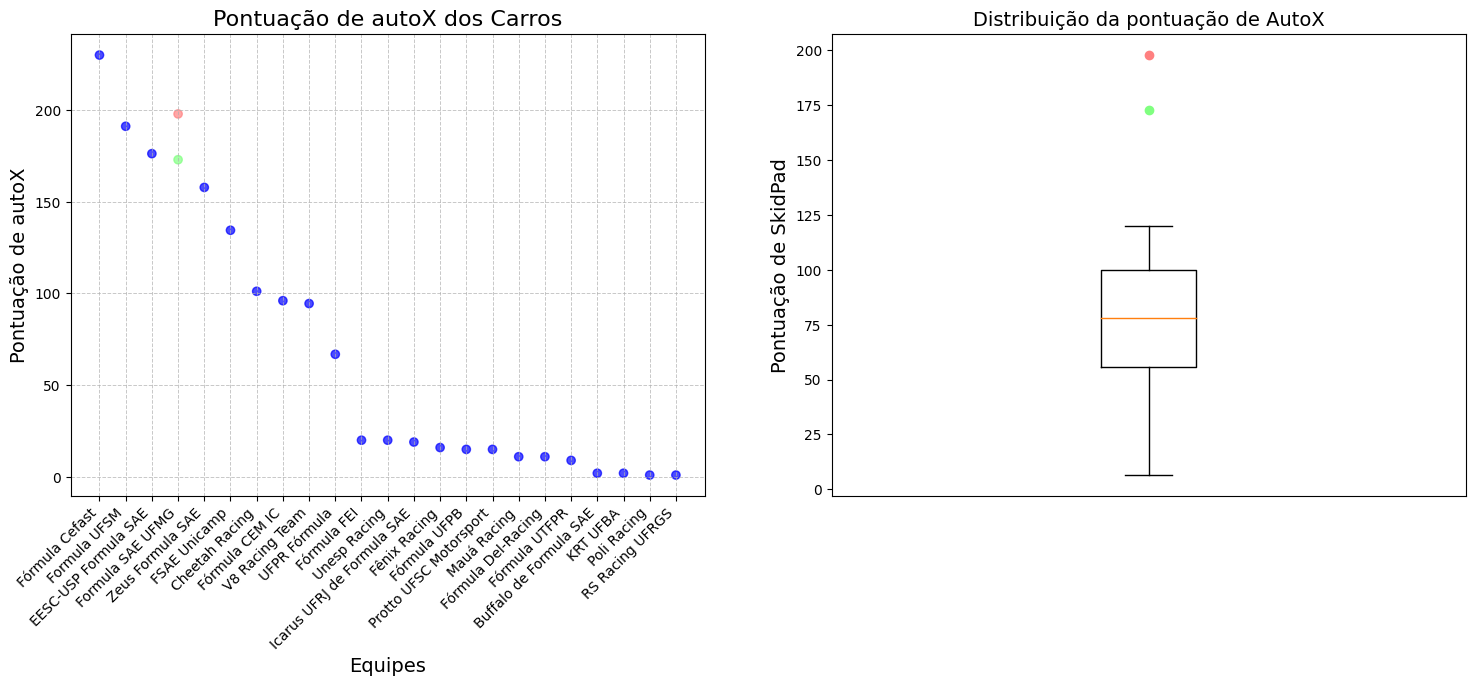

In [28]:
enduroPoints = []
labels = []
cars_sorted = sorted(cars, key=lambda car: car.enduro.points, reverse=True)
for car in cars_sorted:
    if car.enduro.points > 0:
        enduroPoints.append(car.enduro.points)
        labels.append(car.name)
colors = [[0.5, 1, 0.5] if car.name == "Formula SAE UFMG" else 'blue' for car in cars_sorted if car.enduro.points > 0]
labels.append("Formula SAE UFMG")
expectedValue = calculateEnduroScore(winner.getEnduroTotalTime(),ufmg.getEnduroTotalTime()-ufmg.enduro.penalities,22)
enduroPoints.append(expectedValue)
colors.append([1,0.5,0.5])

fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, enduroPoints, color=colors, alpha=0.7)
ax.set_title('Pontuação de autoX dos Carros', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de autoX', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.boxplot(autoXPoints)
ax2.scatter([1],[ufmg.enduro.points], color = [0.5, 1, 0.5])
ax2.scatter([1],[expectedValue], color = [1, 0.5, 0.5])
ax2.set_xticks([])
ax2.set_title("Distribuição da pontuação de AutoX",fontsize = 14)
ax2.set_ylabel('Pontuação de SkidPad', fontsize=14)

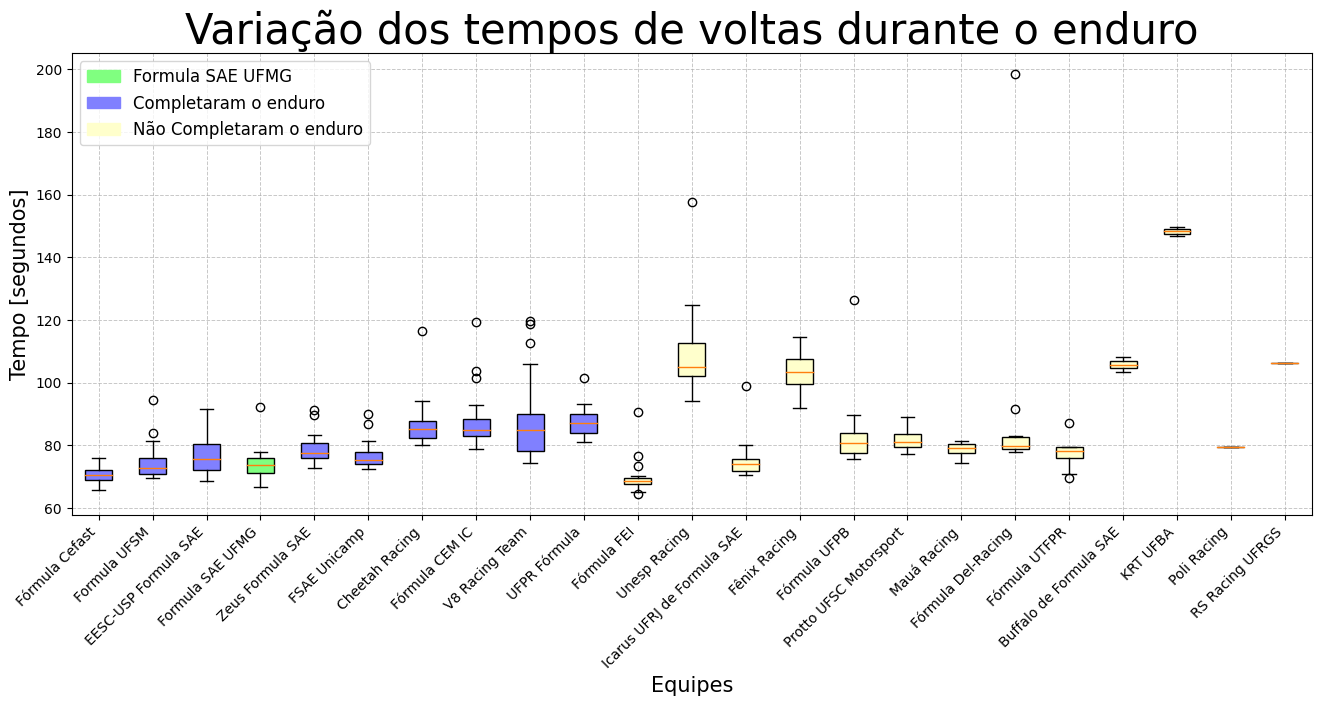

In [29]:
enduroLapTimes = []
labels = []
colors = []
cars_sorted = sorted(cars, key=lambda car: car.enduro.points, reverse=True)
for car in cars_sorted:
    if car.enduro.laps > 0:
        enduroLapTimes.append(car.enduro.lap_times)
        labels.append(car.name)
        if car.name =="Formula SAE UFMG":
            colors.append([0.5,1,0.5])
        elif car.enduro.laps == 22:
            colors.append([0.5,0.5,1])
        elif car.enduro.laps < 22:
            colors.append([1.0, 1.0, 0.8])
fig, ax = plt.subplots(figsize=(16,6))
box = ax.boxplot(enduroLapTimes,patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels,rotation=45,ha='right')
ax.set_title('Variação dos tempos de voltas durante o enduro',fontsize = 30)
ax.set_xlabel('Equipes',fontsize=15)
ax.set_ylabel('Tempo [segundos]',fontsize=15)
legend_labels = {
    'Formula SAE UFMG': [0.5, 1, 0.5],
    'Completaram o enduro': [0.5, 0.5, 1],
    'Não Completaram o enduro': [1.0, 1.0, 0.8]
}
patches_for_legend = [patches.Patch(color=color, label=label) for label, color in legend_labels.items()]
ax.legend(handles=patches_for_legend, loc='best', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)


C:\Users\savic\AppData\Local\Temp\ipykernel_312\1569134109.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


[Text(1, 0, 'Geral'), Text(2, 0, 'E25'), Text(3, 0, 'E100')]

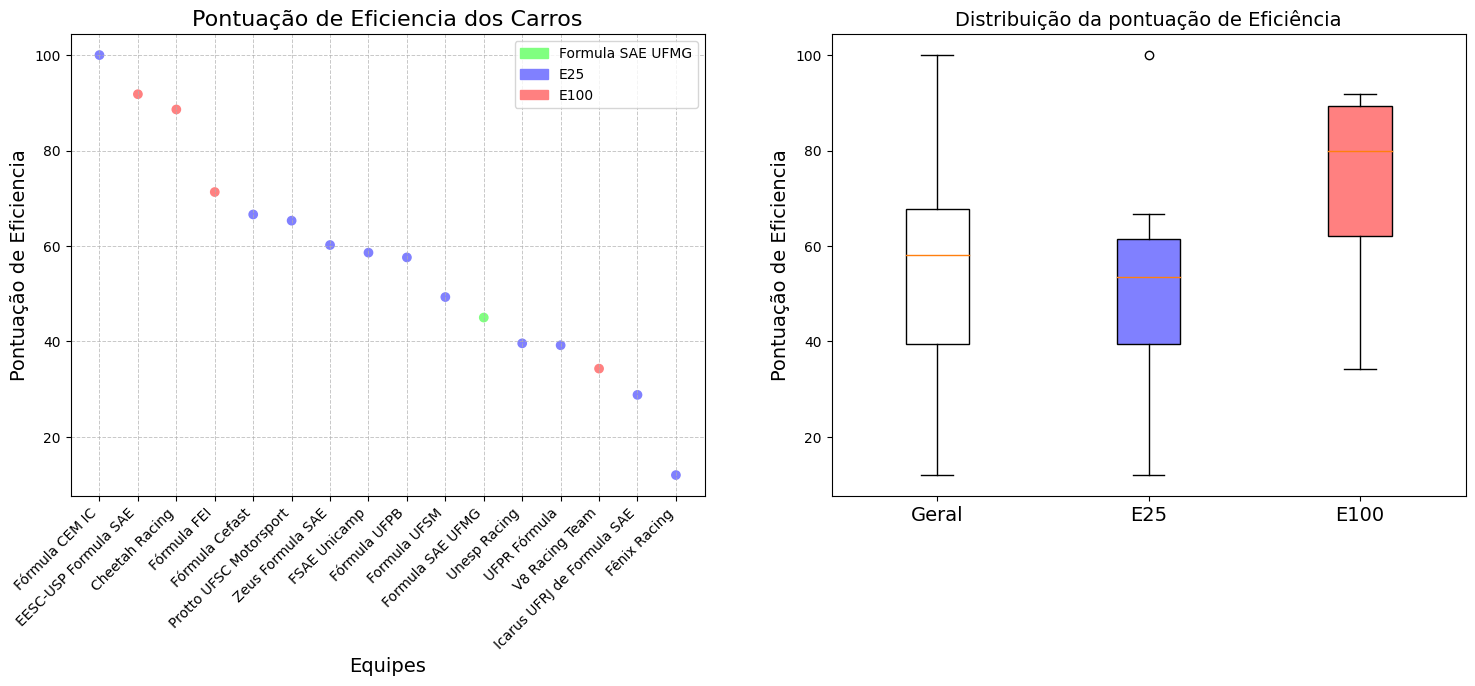

In [30]:
efficiencyPoints = []
e25Points = []
e100Points = []
labels = []
colors = []
color_map = [[1, 1, 1], [0.5, 0.5, 1], [1, 0.5, 0.5]]
cars_sorted = sorted(cars, key=lambda car: car.efficiency.score, reverse=True)
for car in cars_sorted:
    if car.efficiency.score > 0:
        efficiencyPoints.append(car.efficiency.score)
        labels.append(car.name)
    if car.name =="Formula SAE UFMG":
        colors.append([0.5,1,0.5])
        e25Points.append(car.efficiency.score)
    elif car.fuel == "E25":
        e25Points.append(car.efficiency.score)
        colors.append(color_map[1])
    elif car.fuel == "E100":
        colors.append(color_map[2])
        e100Points.append(car.efficiency.score)



fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes[0]
ax2 = axes[1]
ax.scatter(labels, efficiencyPoints, color=colors)
ax.set_title('Pontuação de Eficiencia dos Carros', fontsize=16)
ax.set_xlabel('Equipes', fontsize=14)
ax.set_ylabel('Pontuação de Eficiencia', fontsize=14)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
legend_elements = [
    patches.Patch(color=[0.5, 1, 0.5], label='Formula SAE UFMG'),
    patches.Patch(color=[0.5, 0.5, 1], label='E25'),
    patches.Patch(color=[1, 0.5, 0.5], label='E100'),
]
ax.legend(handles=legend_elements, loc='best')
box = ax2.boxplot([efficiencyPoints,e25Points,e100Points],patch_artist=True)
for patch, color in zip(box['boxes'], color_map):
    patch.set_facecolor(color)
ax2.set_title("Distribuição da pontuação de Eficiência",fontsize = 14)
ax2.set_ylabel('Pontuação de Eficiencia', fontsize=14)
ax2.set_xticklabels(["Geral","E25","E100"],fontsize = 14)

Text(0, 0.5, 'Pontuação de Eficiência')

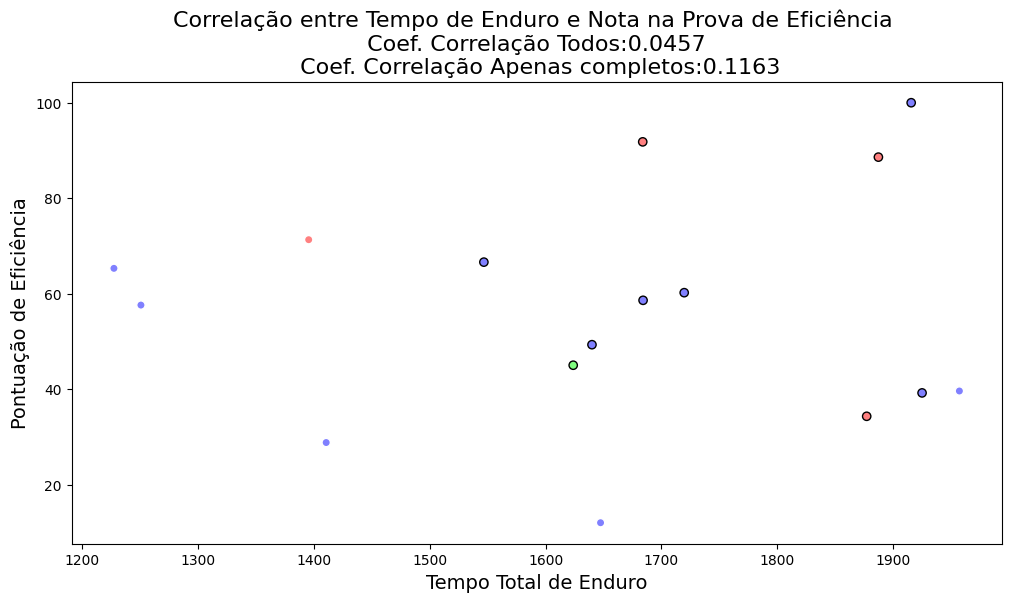

In [31]:
enduroTimes = []
consumed = []
efficiencyScore = []
colors = []
border_colors = []
completedEnduroTimes = []
completedEfficiencyScore = []
for car in cars:
    if car.efficiency.score > 0:
        enduroTimes.append(car.enduro.total_time)
        consumed.append(car.efficiency.consumed)
        efficiencyScore.append(car.efficiency.score)
        if car.efficiency.score > 0:
            efficiencyPoints.append(car.efficiency.score)
            if car.name == "Formula SAE UFMG":
                colors.append([0.5, 1, 0.5])
            elif car.fuel == "E25":
                colors.append([0.5, 0.5, 1])
            elif car.fuel == "E100":
                colors.append([1, 0.5, 0.5])
            if car.enduro.laps == 22:
                border_colors.append('black')
                completedEnduroTimes.append(car.enduro.total_time)
                completedEfficiencyScore.append(car.efficiency.score)
            else:
                border_colors.append('White')


correlation_matrix = np.corrcoef(enduroTimes, efficiencyScore)
correlation_coefficient = correlation_matrix[0, 1]
correlation_matrix = np.corrcoef(completedEnduroTimes, completedEfficiencyScore)
completeCorrelation_coefficient = correlation_matrix[0, 1]

fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(enduroTimes, efficiencyScore, color=colors, edgecolor=border_colors)

ax.set_title(f'Correlação entre Tempo de Enduro e Nota na Prova de Eficiência \n Coef. Correlação Todos:{correlation_coefficient:.4f} \n Coef. Correlação Apenas completos:{completeCorrelation_coefficient:.4f}', fontsize=16)
ax.set_xlabel('Tempo Total de Enduro', fontsize=14)
ax.set_ylabel('Pontuação de Eficiência', fontsize=14)